<a href="https://colab.research.google.com/github/cdevine2021/Data_Sci/blob/main/Devine_Lab_8_Linear_Model_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

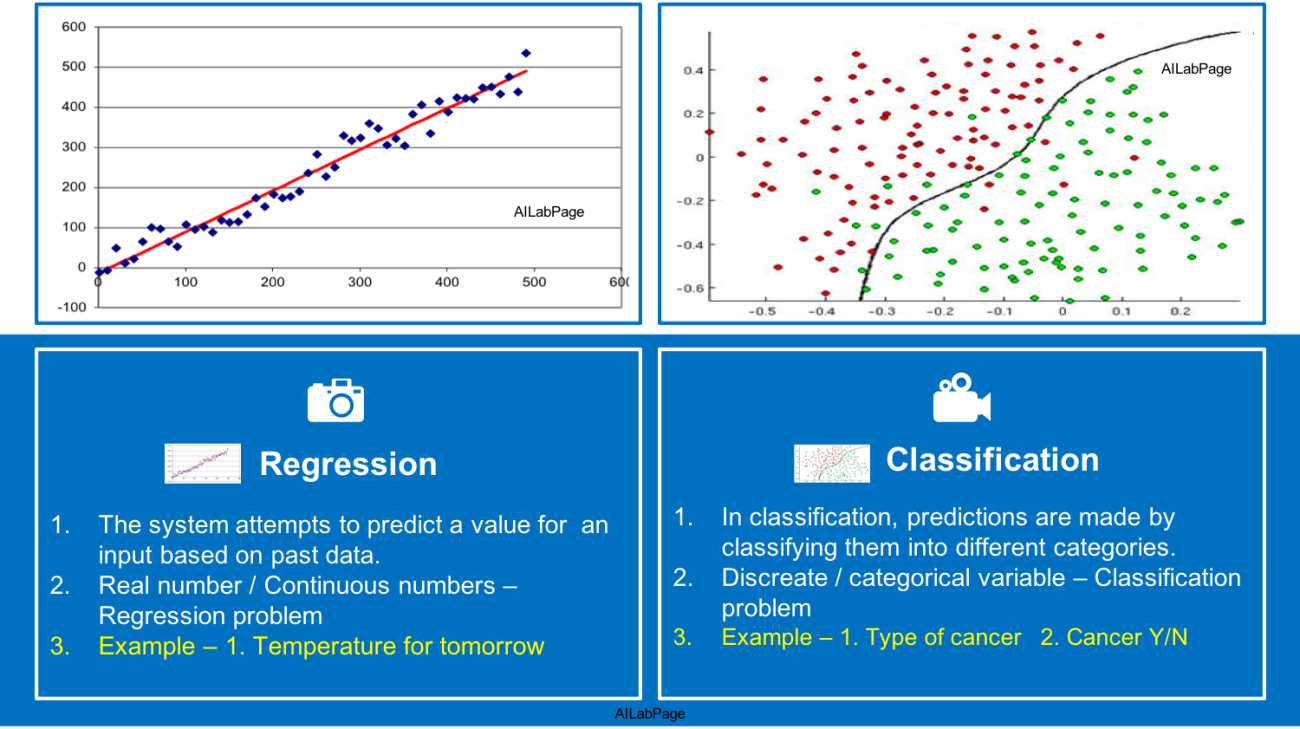

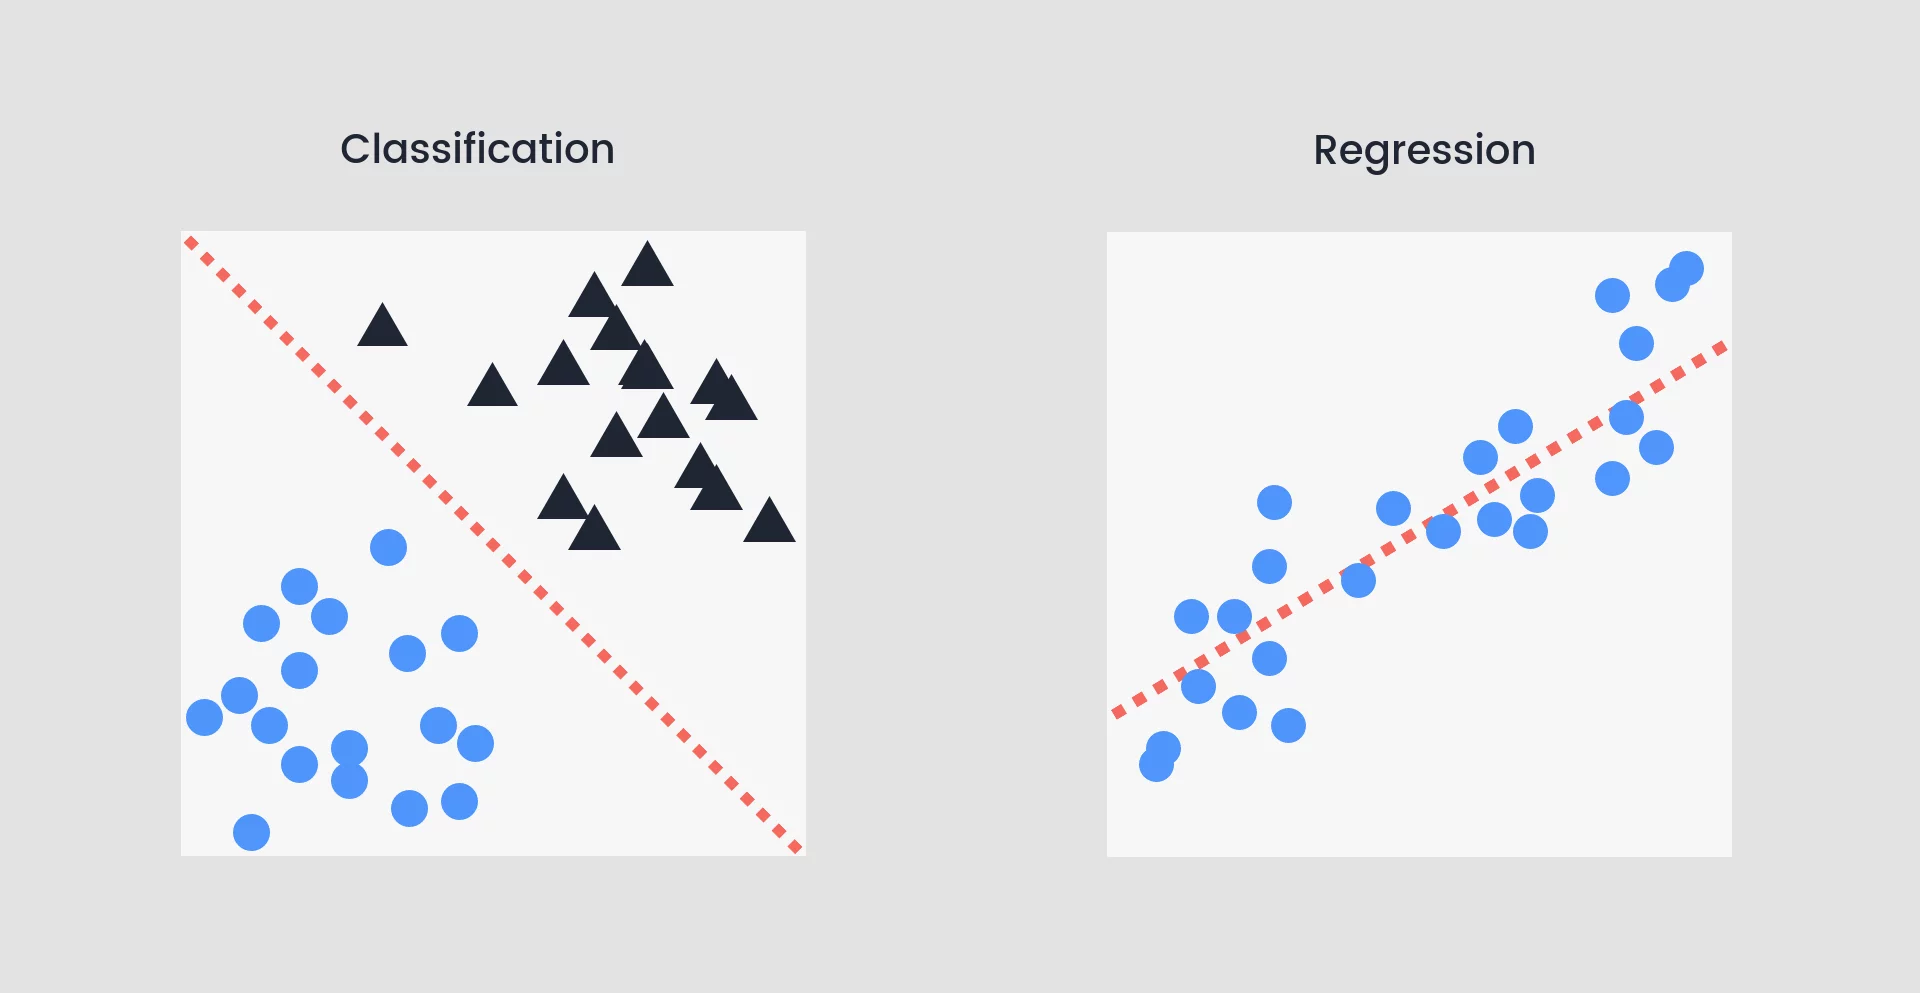

https://docs.google.com/presentation/d/1gY6kLb7YJtWzWqprVe3XfOjHALkPH6I1FvZ7MssWiTU/edit?usp=sharing

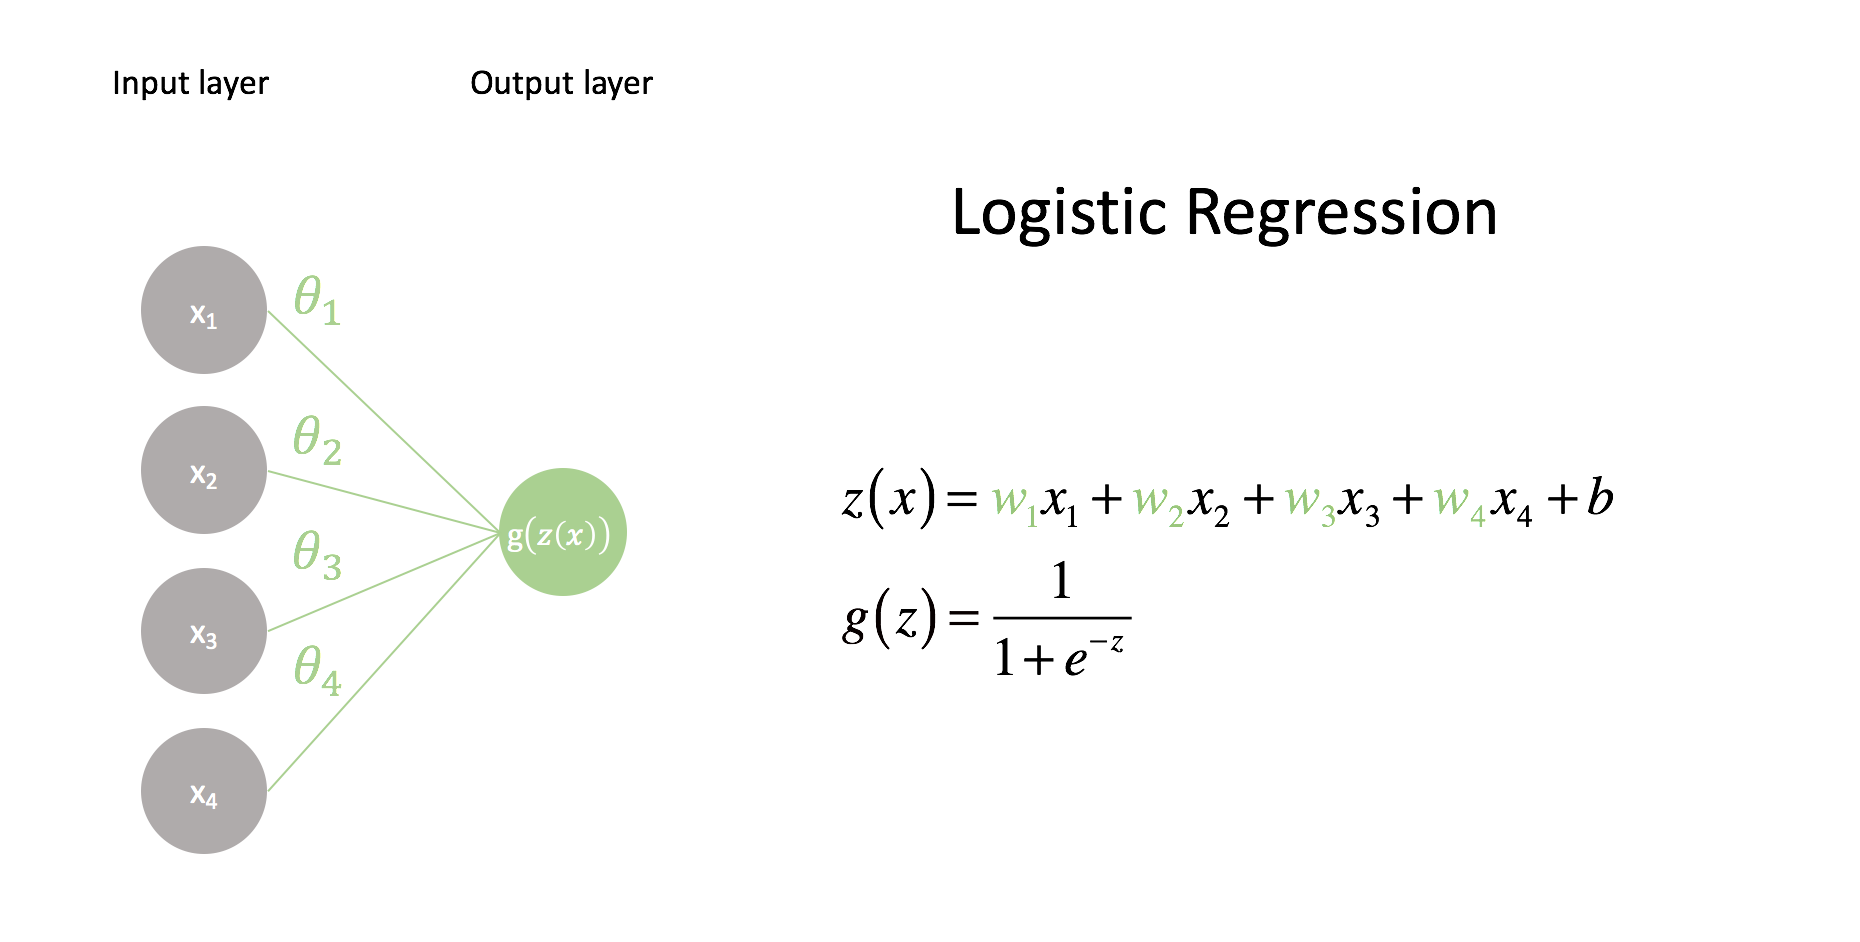

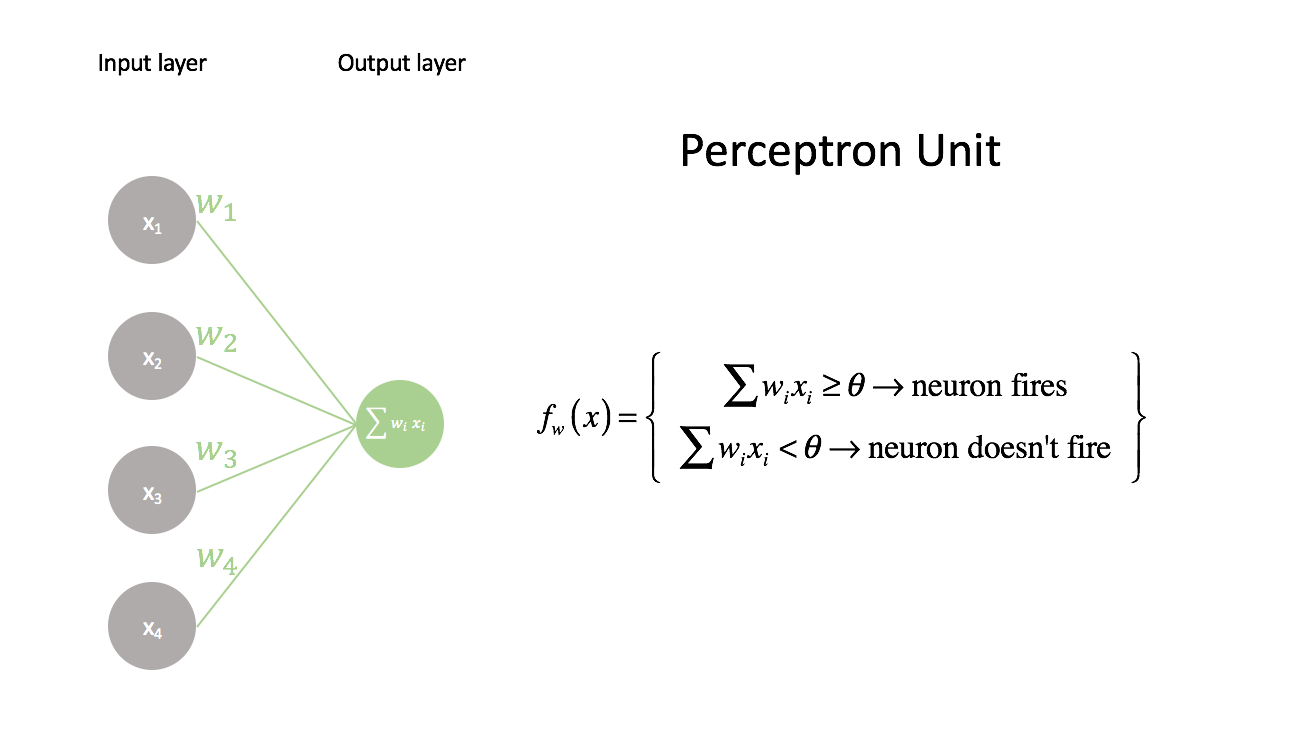

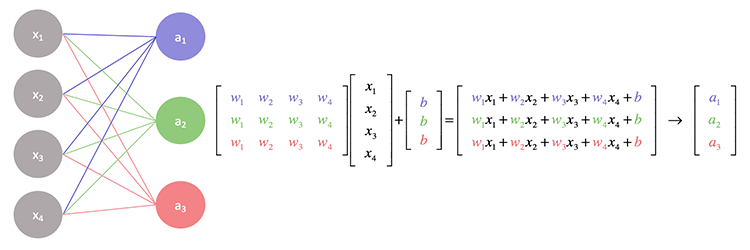

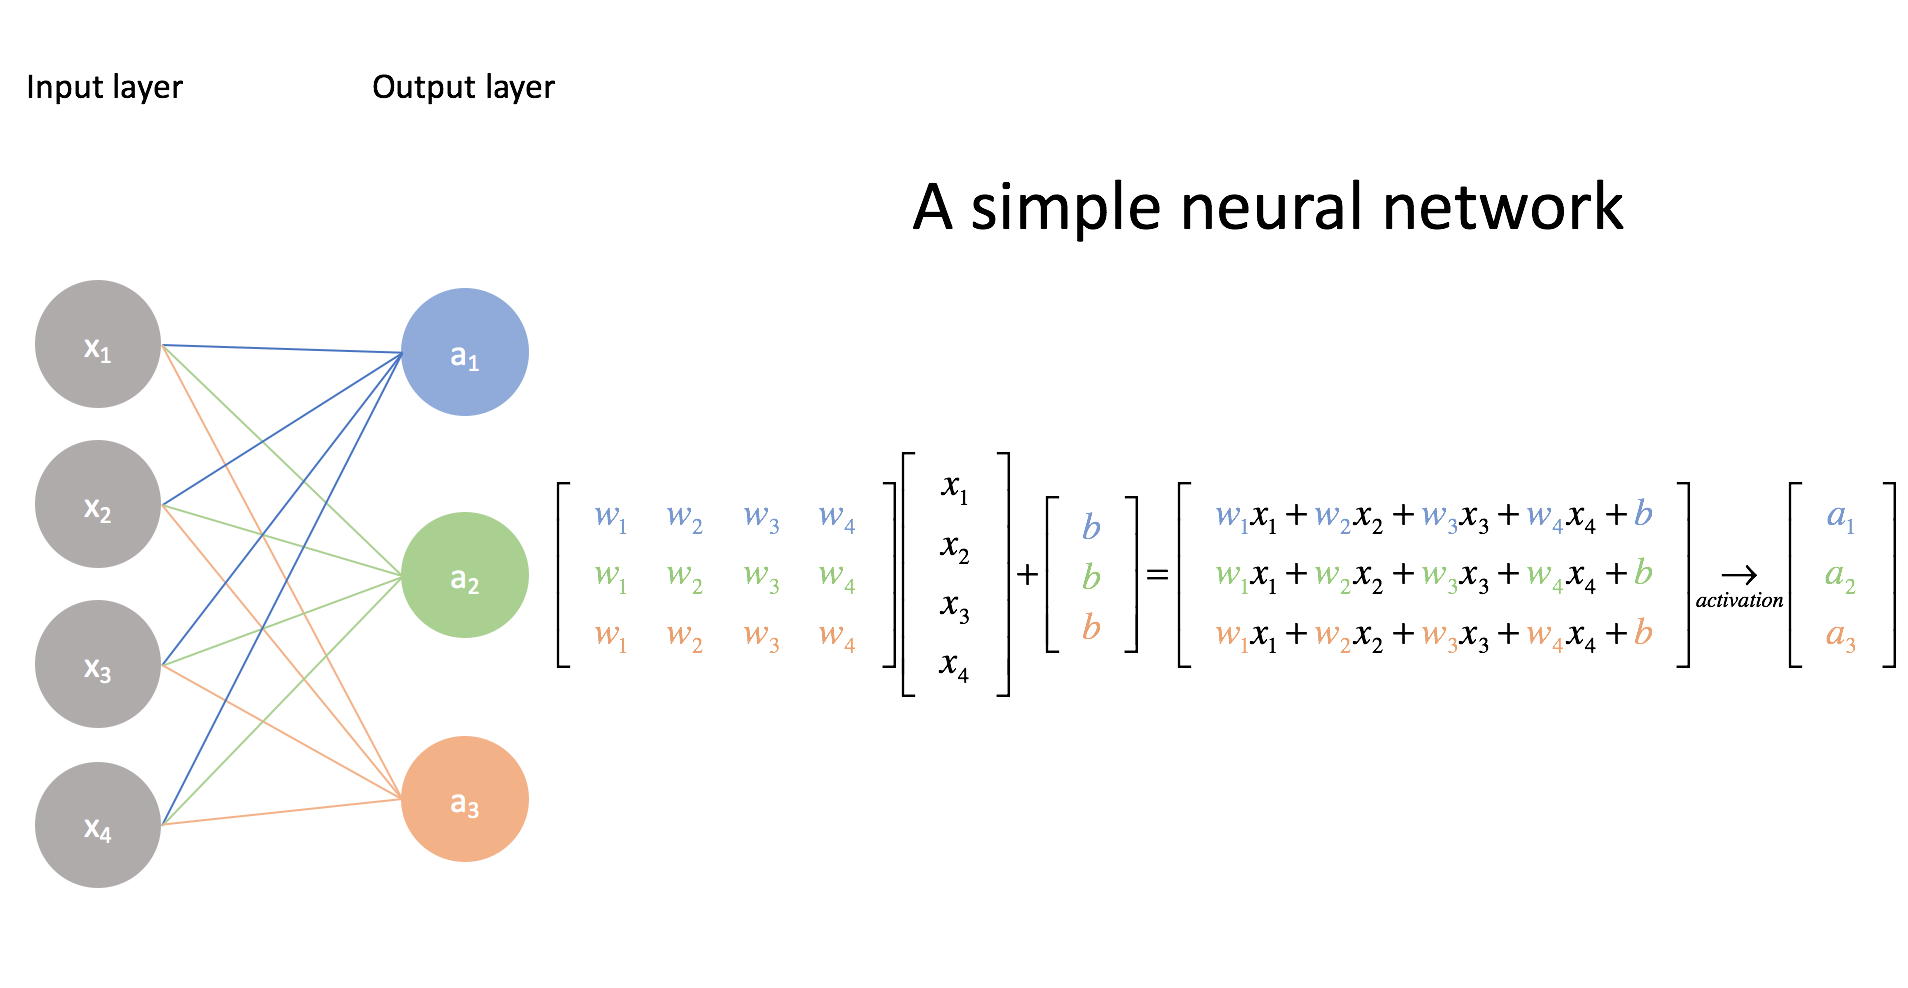

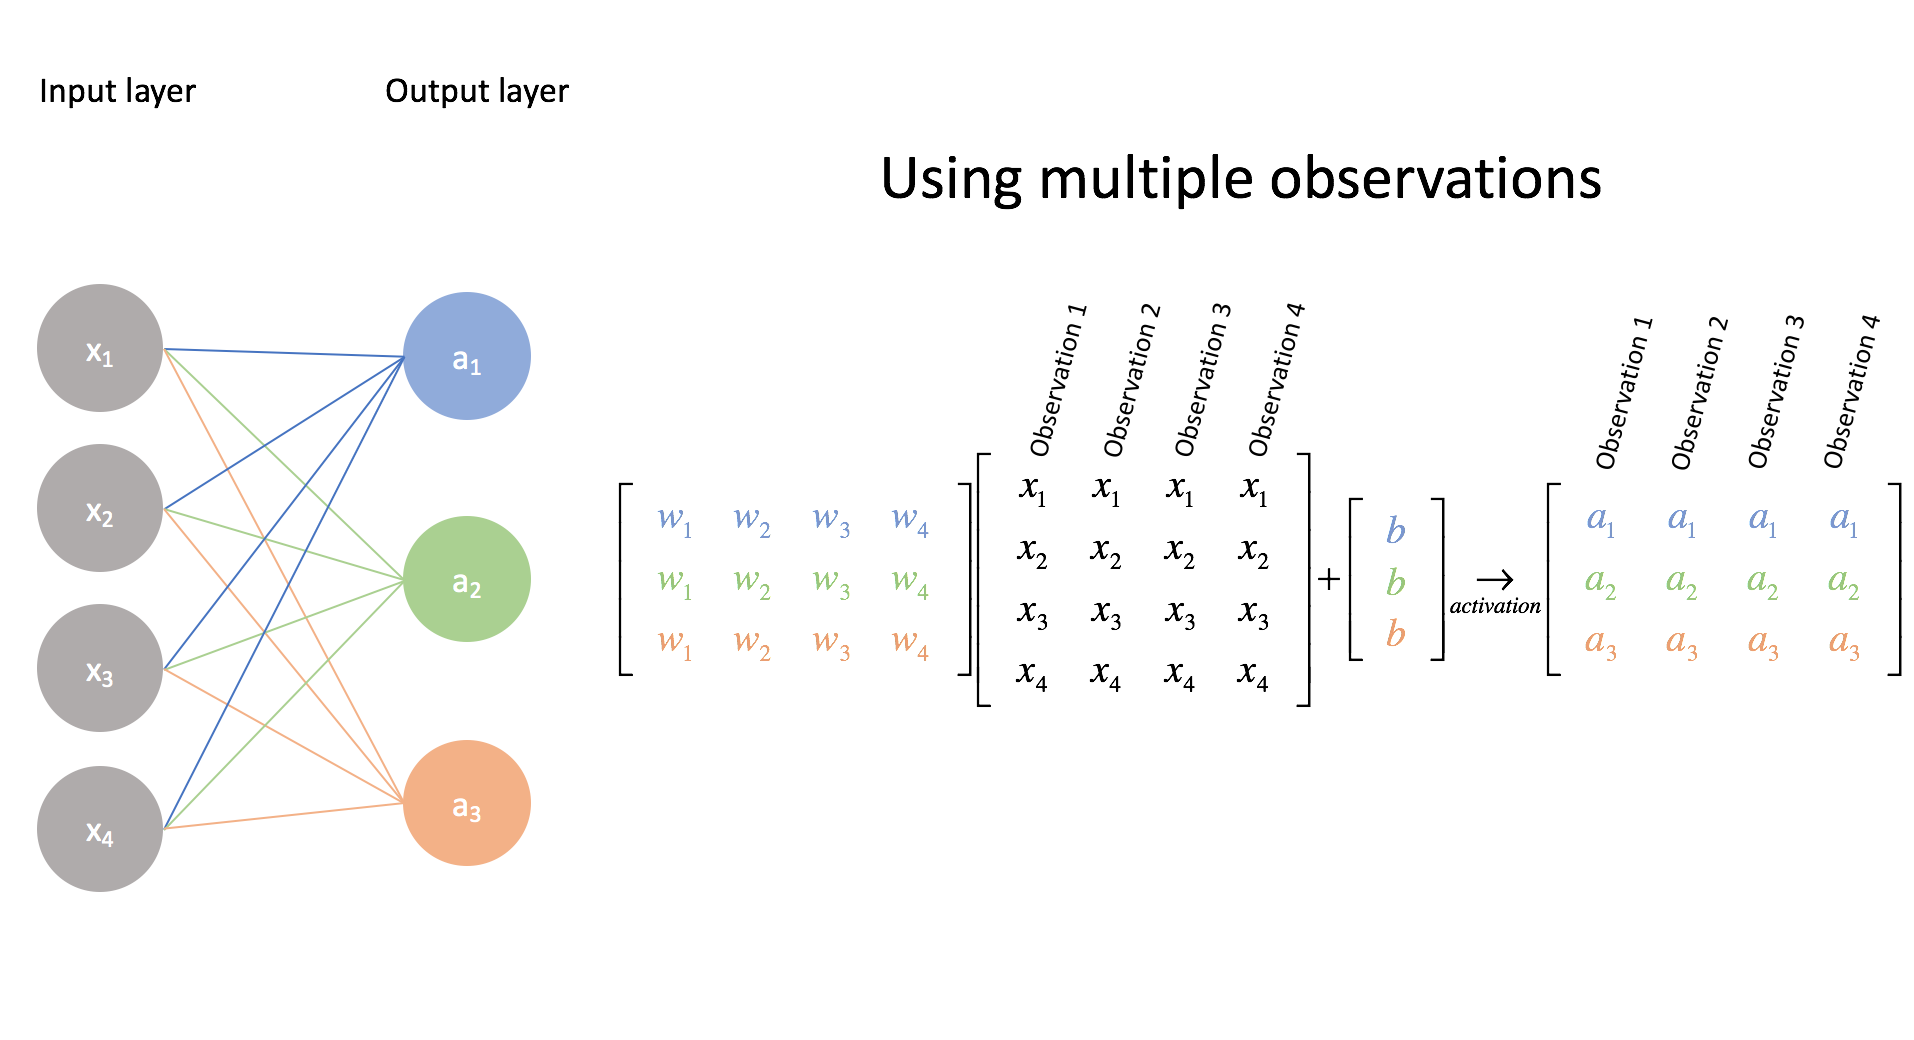

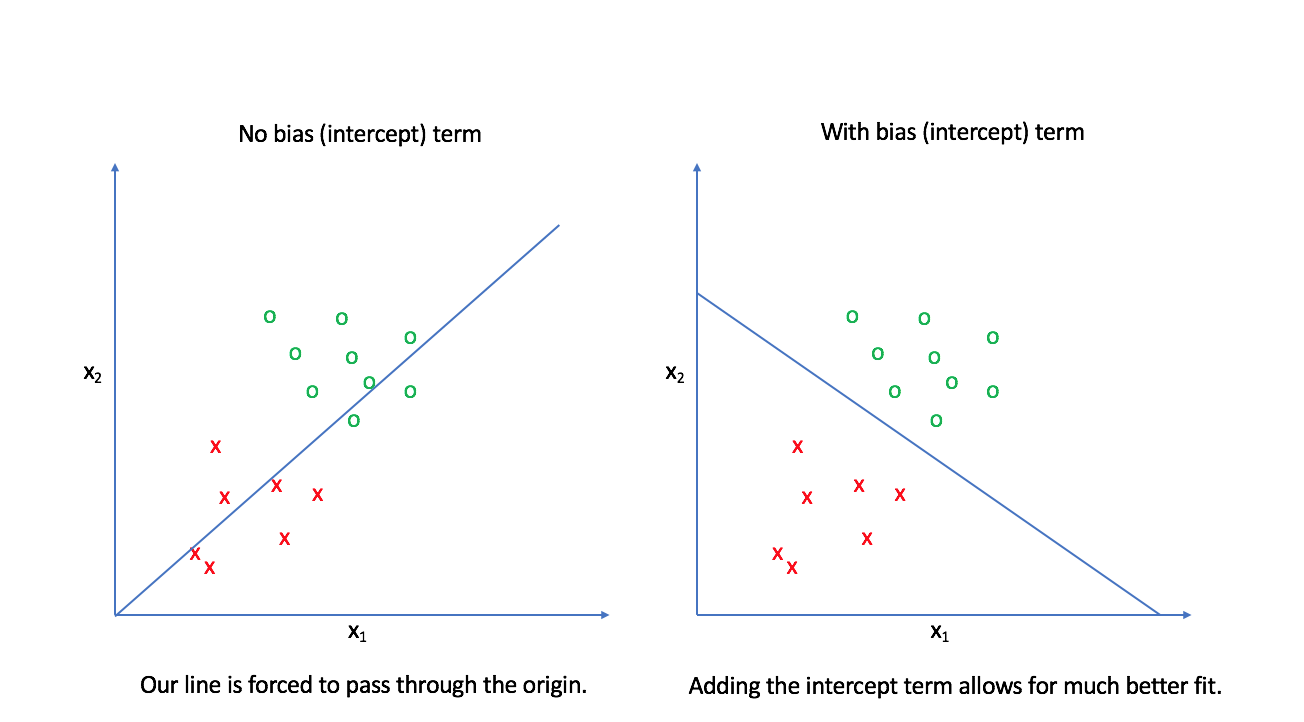

In [2]:
!pip install git+https://github.com/williamedwardhahn/mpcr
from mpcr import *
import numpy as np
import matplotlib.pyplot as plt
!pip install wget
import wget
import torch
import torch.nn as nn
from torch import tensor 
from torch.autograd import Variable
from torch import randn
#importing functions so we can use them throughout the code

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/williamedwardhahn/mpcr to /tmp/pip-req-build-d24vfr7m
  Running command git clone -q https://github.com/williamedwardhahn/mpcr /tmp/pip-req-build-d24vfr7m
  Created wheel for ImportMPCR: filename=ImportMPCR-0.0.1-py3-none-any.whl size=7682 sha256=1594185e8d2f85271cf75fcee4b4591e744c55550da58c5ce773b7a4ceb0c405
  Stored in directory: /tmp/pip-ephem-wheel-cache-ocmlzux_/wheels/8e/ce/5f/35330a2ccb2f50a7b7061e8a8b87f1ebe8d617d383beddc76f
Successfully built ImportMPCR


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9674 sha256=a9edb994c03b5c7b816b113305a72f31e402826423490f54cec2049c6489f2a5
  Stored in directory: /root/.cache/pip/wheels/bd/a8/c3/3cf2c14a1837a4e04bd98631724e81f33f462d86a1d895fae0
Successfully built wget


# $y=mx+b$

In [3]:
x = np.arange(0,9)
#assigning x to equal an arrange of numbers between 0 and 9

In [4]:
x.shape
#showing the shape of x

(9,)

In [5]:
x = x[:,None]
# assigning x to a new answer of x[:,None]

In [6]:
x.shape
#showing the new shape of x

(9, 1)

In [7]:
y = 3*x-5
#creating a formula that is equal to y

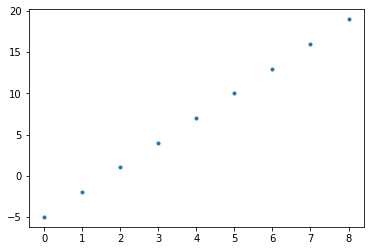

In [8]:
plt.plot(x,y,'.')
#plottting x and y points

##Solve Linear Fit Using Pytorch Gradient Descent

In [9]:
x = torch.Tensor(x) # Convert the numpy vectors to pytorch tensors 
y = torch.Tensor(y)

In [10]:
m = Variable(randn(1,1), requires_grad=True) # Initialize pytorch variables, i.e. values you want to optimize. In this case with normally distributed random numbers, one for m the slope and one for b the interscept
b = Variable(randn(1,1), requires_grad=True)

In [11]:
learning_rate = 0.001 # Descend Gradient Slowly so as to Not Overshoot Minima and Oscillate

In [12]:
for t in range(1000):

    y_pred = m * x + b  # Define Model 
    
    loss = (y_pred - y).pow(2).sum() # Define Loss Function as Sum of the Squares of the Differences 

    loss.backward() # Calculate Gradient, dLoss/dp for Each Parameter p 
    
    m.data -= learning_rate * m.grad.data # Gradient Descent
    b.data -= learning_rate * b.grad.data

    m.grad.zero_() # Reset Gradient Value
    b.grad.zero_()

    print(t, loss.item(),m.item(),b.item()) #printing loss.item, m.item, and b.item

0 1949.5794677734375 0.2999795079231262 0.3068992495536804
1 708.9821166992188 1.019491195678711 0.4057765603065491
2 292.32891845703125 1.438322901725769 0.4510692059993744
3 152.0275115966797 1.683010220527649 0.46539071202278137
4 104.41853332519531 1.826833963394165 0.46183693408966064
5 87.90374755859375 1.9122334718704224 0.44799181818962097
6 81.82337188720703 1.9637868404388428 0.4282471537590027
7 79.24817657470703 1.9957280158996582 0.405146062374115
8 77.85408020019531 2.0163004398345947 0.38016101717948914
9 76.8615493774414 2.030278205871582 0.35414448380470276
10 76.00907897949219 2.040426254272461 0.32758983969688416
11 75.20890045166016 2.0483458042144775 0.30078253149986267
12 74.43152618408203 2.054964303970337 0.2738875448703766
13 73.6670150756836 2.060818910598755 0.24700012803077698
14 72.91197204589844 2.066220760345459 0.22017516195774078
15 72.16521453857422 2.07135009765625 0.1934441179037094
16 71.42626953125 2.0763113498687744 0.16682490706443787
17 70.69496

In [13]:
loss.item()
#printing out what loss.item is

0.002887710230425

In [14]:
m.item()
#printing out what m.item is

2.994128704071045

In [15]:
b.item()
#printing out what b.item is

-4.967146873474121

# Pytorch Linear Model

In [16]:
# Hyper-parameters
input_size = 1
output_size = 1
num_epochs = 1000
learning_rate = 0.01
#parameters for the linear model

In [17]:
# Linear regression model
model = nn.Linear(input_size, output_size)
# making model equal to nn.Linear(input_size, output_size)

In [18]:
# Loss and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)  
# creating a formula for loss and the optimizer

In [19]:
# Convert numpy arrays to torch tensors
inputs = x
targets = y
#converting y and x to torch tensors which are inputs and targets

In [20]:
# Train the model
for epoch in range(num_epochs):
    
    
    # Forward pass
    outputs = model(inputs)
    
    loss = criterion(outputs, targets) #making loss equal to criterion(outputs, targets)
    
    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    
    print(epoch+1, num_epochs, loss.item()) #printing the loss item, num_epochs, and epoch+1


1 1000 112.05437469482422
2 1000 36.05573272705078
3 1000 14.467559814453125
4 1000 8.300785064697266
5 1000 6.505247116088867
6 1000 5.949136734008789
7 1000 5.74483585357666
8 1000 5.64077615737915
9 1000 5.565649509429932
10 1000 5.49924373626709
11 1000 5.435822010040283
12 1000 5.373753070831299
13 1000 5.312569618225098
14 1000 5.252132415771484
15 1000 5.192397594451904
16 1000 5.133346080780029
17 1000 5.074965000152588
18 1000 5.017250061035156
19 1000 4.96019172668457
20 1000 4.903783321380615
21 1000 4.8480143547058105
22 1000 4.792880058288574
23 1000 4.738372802734375
24 1000 4.68448543548584
25 1000 4.631211280822754
26 1000 4.578542709350586
27 1000 4.526473045349121
28 1000 4.474996566772461
29 1000 4.424103736877441
30 1000 4.3737921714782715
31 1000 4.324050426483154
32 1000 4.274875640869141
33 1000 4.226259231567383
34 1000 4.178195476531982
35 1000 4.130678653717041
36 1000 4.083703994750977
37 1000 4.037262439727783
38 1000 3.991349220275879
39 1000 3.945956230163

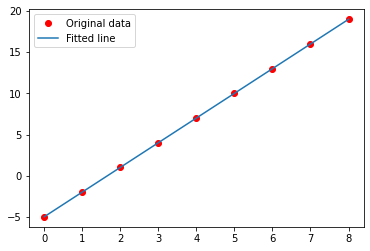

In [21]:
# Plot the graph
predicted = model(inputs).detach().numpy()


plt.plot(x, y, 'ro', label='Original data')
plt.plot(x, predicted, label='Fitted line')
plt.legend()
plt.show()
#plotting the grapgh of the predicted data and the original data

In [22]:
model
#showing what model is equal to

Linear(in_features=1, out_features=1, bias=True)

In [23]:
model.weight
#showing the model.weight and what it is equal to

Parameter containing:
tensor([[2.9973]], requires_grad=True)

In [24]:
model.bias
# showing what model.bias is equal to, inside the parameters

Parameter containing:
tensor([-4.9851], requires_grad=True)

In [25]:
def GPU(data):
    return torch.tensor(data, requires_grad=True, dtype=torch.float, device=torch.device('cuda'))
#defining GPU(data) and returning the torch tensor that is True to reguiring grad

def GPU_data(data):
    return torch.tensor(data, requires_grad=False, dtype=torch.float, device=torch.device('cuda'))
#defining GPU(data) and returning the torch tensor that is False to reguiring grad

In [26]:
def plot(x):
    if type(x) == torch.Tensor :
        x = x.cpu().detach().numpy()

    fig, ax = plt.subplots()
    im = ax.imshow(x, cmap = 'gray')
    ax.axis('off')
    fig.set_size_inches(10, 10)
    plt.show()
#defining the plot of x. setting the size inches to 10,10. torch tensor is x=x.cpu().detach().numpy()

In [27]:
def plotfc(x):
    if type(x) == torch.Tensor :
        x = x.cpu().detach().numpy()

    fig, ax = plt.subplots()
    im = ax.imshow(x, cmap = 'cool')
    ax.axis('off')
    fig.set_size_inches(10, 10)
    plt.colorbar(im)
    plt.show()
#defining the plot of x. setting the size inches to 10,10. torch tensor is x=x.cpu().detach().numpy(). but changing the cmap from gray to cool

In [28]:
def montage_plot(x):
    x = np.pad(x, pad_width=((0, 0), (1, 1), (1, 1)), mode='constant', constant_values=0)
    plot(montage(x))
#defining the montage plot of x. Making the mode constant

In [29]:
def one_hot(y):
    y2 = GPU_data(torch.zeros((y.shape[0],10)))
    for i in range(y.shape[0]):
        y2[i,int(y[i])] = 1
    return y2
#defining one_hot of y. making y2 equal to the GPU_data. and then returning y2 after you see if i is in range of y.shape

In [30]:
# #MNIST
#train_set = datasets.MNIST('./data', train=True, download=True)
#test_set = datasets.MNIST('./data', train=False, download=True)

#KMNIST
train_set = datasets.KMNIST('./data', train=True, download=True)
test_set = datasets.KMNIST('./data', train=False, download=True)

# Fashion MNIST
#train_set = datasets.FashionMNIST('./data', train=True, download=True)
#test_set = datasets.FashionMNIST('./data', train=False, download=True)

  0%|          | 0/18165135 [00:00<?, ?it/s]

Extracting ./data/KMNIST/raw/train-images-idx3-ubyte.gz to ./data/KMNIST/raw



  0%|          | 0/29497 [00:00<?, ?it/s]

Extracting ./data/KMNIST/raw/train-labels-idx1-ubyte.gz to ./data/KMNIST/raw



  0%|          | 0/3041136 [00:00<?, ?it/s]

Extracting ./data/KMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/KMNIST/raw



  0%|          | 0/5120 [00:00<?, ?it/s]

Extracting ./data/KMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/KMNIST/raw



In [31]:
X = train_set.data.numpy()
X_test = test_set.data.numpy()
Y = train_set.targets.numpy()
Y_test = test_set.targets.numpy()

X = X[:,None,:,:]/255
X_test = X_test[:,None,:,:]/255
# assigning X, X_test, Y, Y_test all to different equations.

In [32]:
X.shape
#showing the shape of X

(60000, 1, 28, 28)

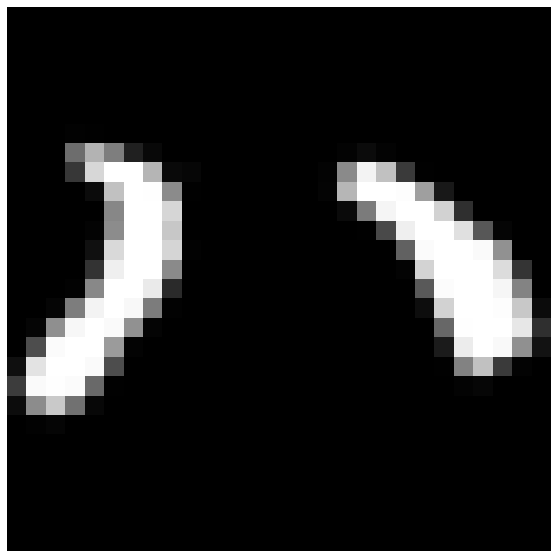

In [33]:
plot(X[13,0,0:28,0:28])
#plotting the parameters for the image

In [34]:
Y[123]
#printing Y and 123 number

2

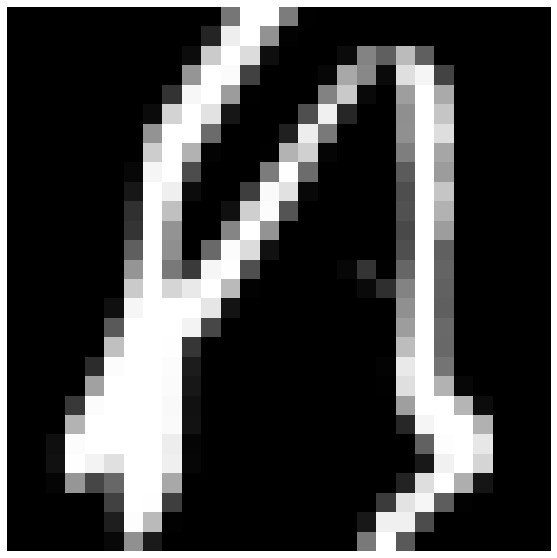

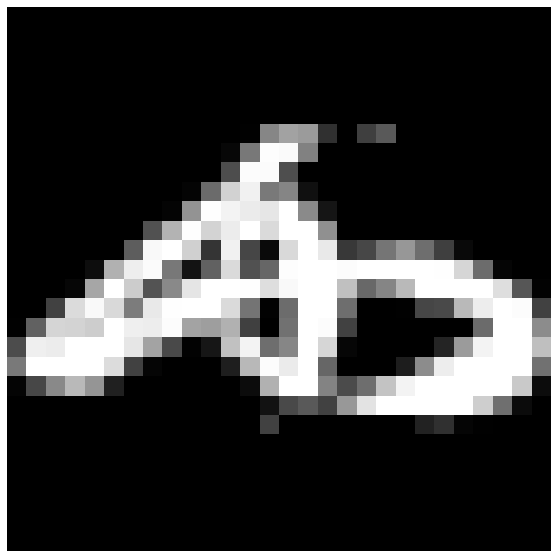

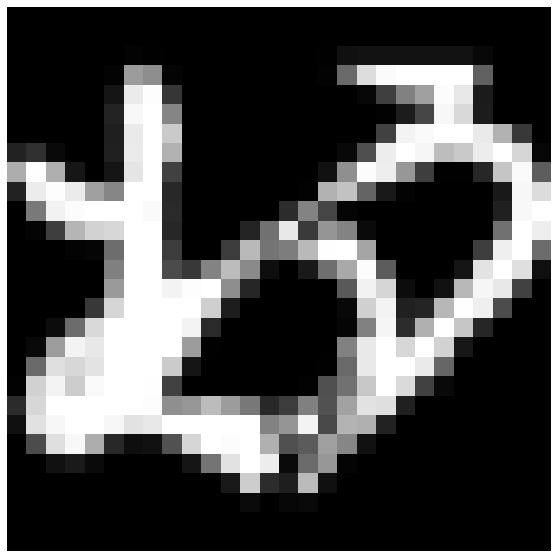

In [35]:
for i in range(3):
    plot(X[i,0,:,:])
#saying that for i if in the range of 3, plot (X[i,0,:,:])

In [36]:
Y
#showing what Y is equal to

array([8, 7, 0, ..., 0, 4, 9])

In [37]:
X[0:25,0,:,:].shape
#showing the shape for the numbers 0,25,0

(25, 28, 28)

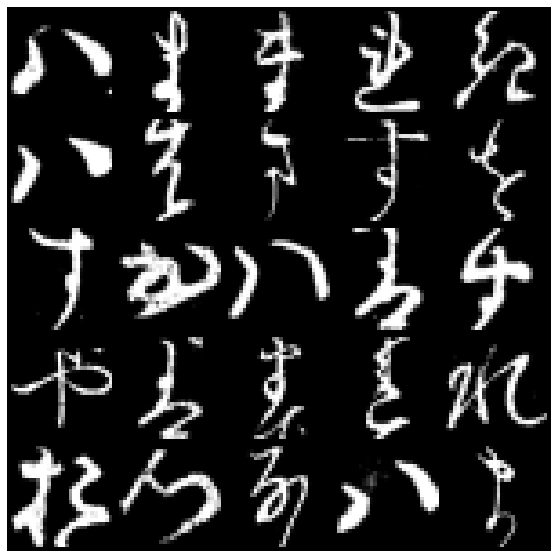

In [38]:
montage_plot(X[125:150,0,:,:])
#showing multiple images all within one plot

In [39]:
X.shape[0]
#showing what X.shape[0] is

60000

In [40]:
X_test.shape
#showing what X_test.shape is

(10000, 1, 28, 28)

In [41]:
X.shape[0]
#showing what X.shape[0] is

60000

In [42]:
X_test.shape[0]
#showing what X_test.shape[0] is

10000

In [43]:
28*28
#multiplying 28 times 28

784

In [44]:
X = X.reshape(X.shape[0],784)
X_test = X_test.reshape(X_test.shape[0],784)
#assigning X and X_test to new equations

In [45]:
X.shape,X_test.shape
#showing what X.shape and X_test.shape are 

((60000, 784), (10000, 784))

In [46]:
X[0]
#showing the data that falls under X[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.4627451 , 1.        , 1.        , 0.48627451,
       0.00392157, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.14117647, 0.93333333,
       1.        , 0.57254902, 0.00784314, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.04705882, 0.79607843, 1.        , 0.8627451 , 0.05490196,
       0.        , 0.        , 0.        , 0.04313725, 0.51764

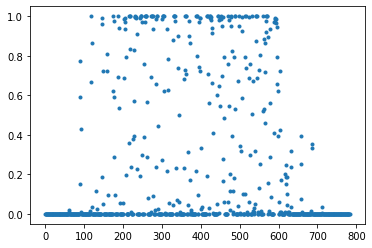

In [47]:
plt.plot(X[100],'.')
#plotting the data of X[100] with a period as its symbol

(array([548.,  11.,  17.,  18.,  15.,  17.,  16.,  14.,  16., 112.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

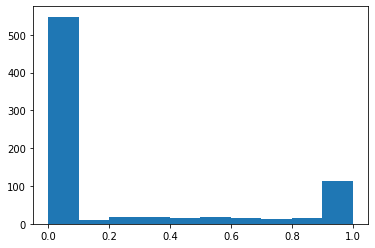

In [48]:
plt.hist(X[0])
#creating a histogram for the data that falls under X[0]

In [49]:
X = GPU_data(X)
Y = GPU_data(Y)
X_test = GPU_data(X_test)
Y_test = GPU_data(Y_test)
#creating new equations for X, Y, X_test and Y_test

In [50]:
url = 'https://github.com/williamedwardhahn/ComplexSystems/raw/main/W.data'  
wget.download(url,"W.data")
#importing an url so we will be bale to use the data and pull it out into the code

'W.data'

In [51]:
W = torch.load("W.data")
#making W equal to torch.load("W.data") so we are able to pull the data from W.data

In [52]:
W.shape
#showing what W.shape is equl to

torch.Size([784, 10])

In [53]:
X.shape
#showing what X.shpae is equal to

torch.Size([60000, 784])

In [54]:
def plot(x):
    if type(x) == torch.Tensor :
        x = x.cpu().detach().numpy()

    fig, ax = plt.subplots()
    im = ax.imshow(x, cmap = 'gray')
    ax.axis('off')
    fig.set_size_inches(10, 100)
    plt.show()
#defining the plot of x, if type(x) == torch.Tensor: x=x.cpu().detach().numpy(). cmap is gray. and then showing

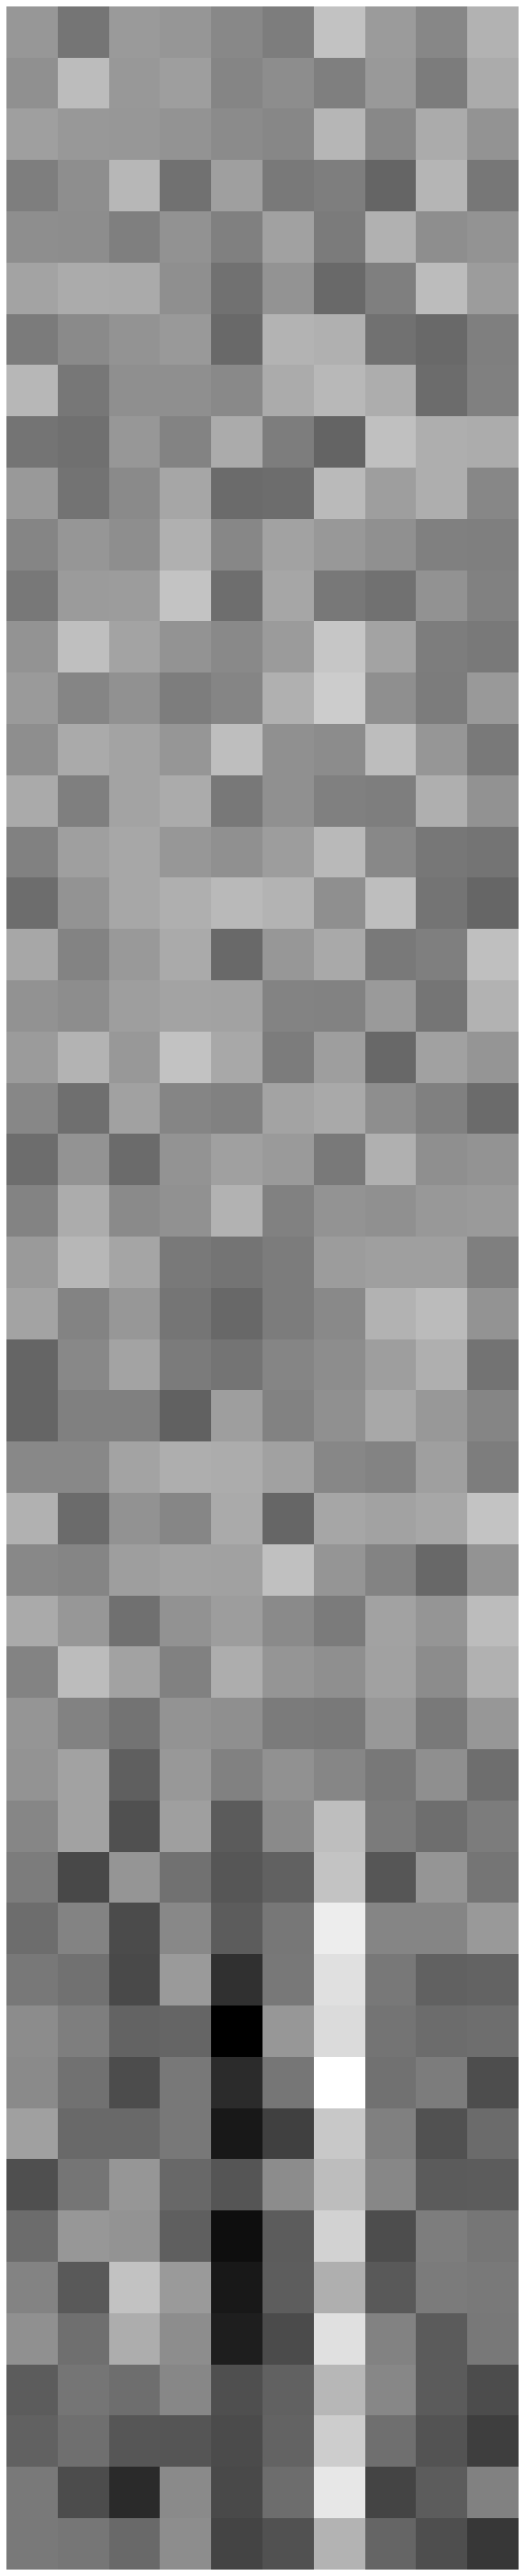

In [55]:
plot(W[0:50,:10])
#plotting W[0:50,:10]

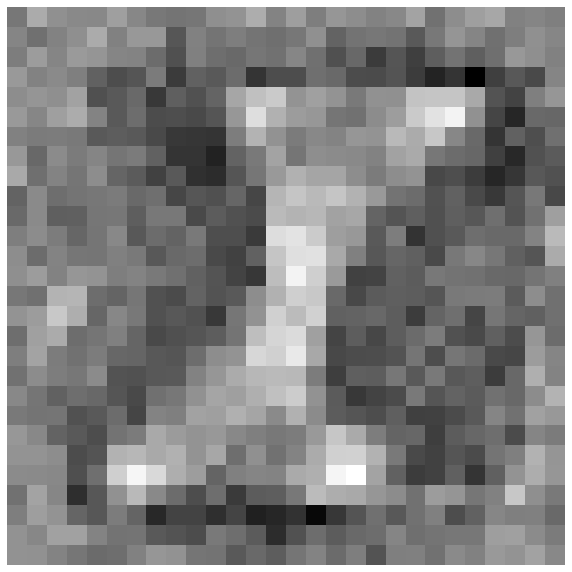

In [56]:
plot(W[:,1].reshape(28,28))
#plotting first image from W and reshaping to 28 by 28

In [57]:
X.shape
#showing what X.shape is equal to

torch.Size([60000, 784])

In [58]:
b = 1000

def get_batch(mode):
    if mode == "train":
        r = np.random.randint(X.shape[0]-b) 
        x = X[r:r+b,:]
        y = Y[r:r+b]
    elif mode == "test":
        r = np.random.randint(X_test.shape[0]-b)
        x = X_test[r:r+b,:]
        y = Y_test[r:r+b]
    return x,y
# shwoing b is equal 1000. defining get_batch(mode). assigning r, x, and y to different equations that only work if mode == train. returning x,y

In [59]:
x,y = get_batch('train')
#making x,y equal to get_batch('train')

In [60]:
x.shape
#showing the new x.shape

torch.Size([1000, 784])

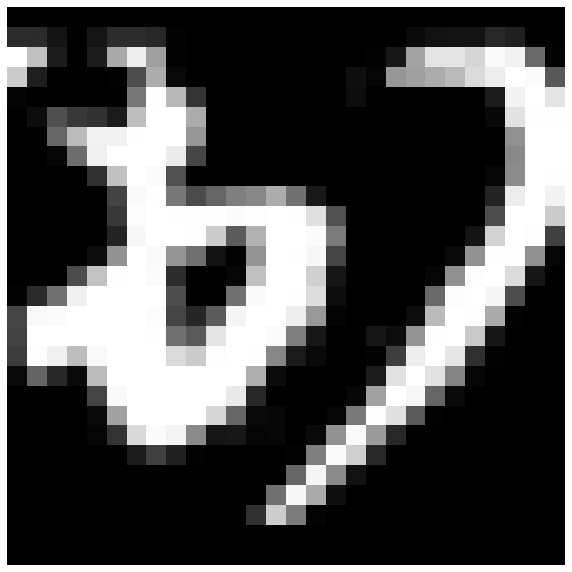

In [61]:
plot(x[0].reshape(28,28))
# plotting the image that falls in the spot of 0 and reshaping it to 28 by 28

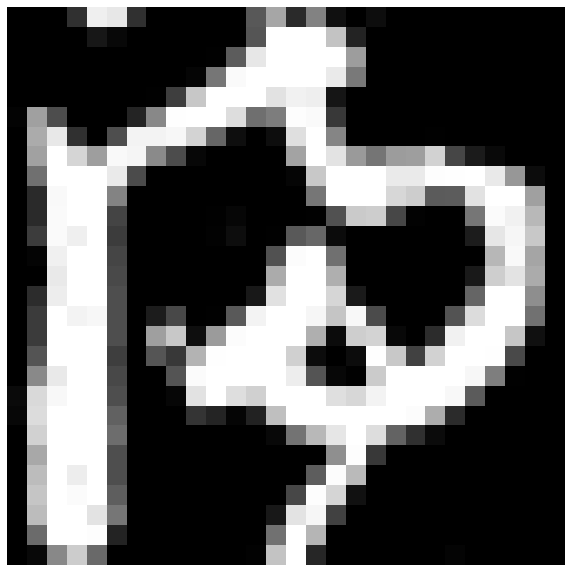

In [62]:
plot(x[1].reshape(28,28))
# plotting the image that falls in the spot of 1 and reshaping it to 28 by 28

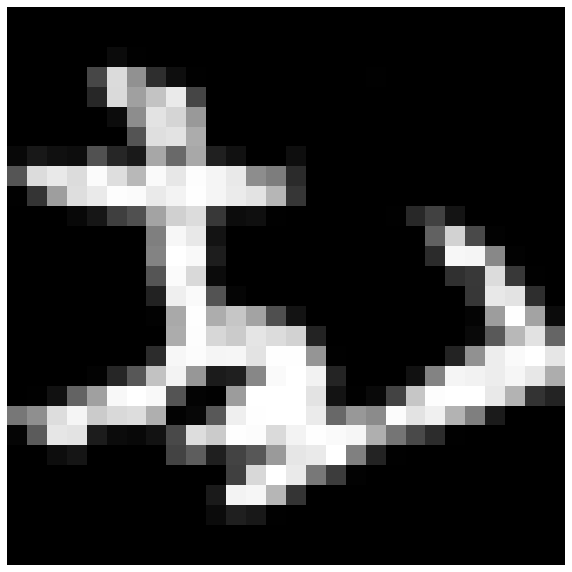

In [63]:
plot(x[2].reshape(28,28))
# plotting the image that falls in the spot of 2 and reshaping it to 28 by 28

In [64]:
y
#shwoing the array of data that y is equal to

tensor([0., 6., 0., 9., 6., 5., 4., 7., 8., 0., 7., 0., 3., 2., 4., 8., 1., 3.,
        4., 8., 6., 1., 8., 9., 9., 2., 7., 1., 1., 4., 2., 5., 8., 7., 9., 4.,
        3., 2., 2., 4., 5., 6., 2., 4., 1., 6., 9., 1., 1., 7., 5., 6., 2., 6.,
        1., 6., 0., 8., 5., 0., 8., 5., 3., 7., 8., 1., 8., 2., 9., 4., 8., 9.,
        1., 9., 9., 2., 4., 2., 7., 0., 0., 8., 9., 2., 1., 4., 3., 9., 3., 7.,
        6., 0., 1., 1., 3., 8., 6., 0., 8., 5., 4., 4., 9., 3., 1., 3., 0., 8.,
        3., 6., 7., 2., 2., 8., 0., 4., 0., 3., 2., 5., 6., 0., 7., 4., 0., 9.,
        7., 3., 0., 1., 1., 4., 7., 4., 3., 9., 4., 3., 6., 8., 6., 2., 1., 8.,
        6., 3., 2., 4., 2., 0., 9., 5., 3., 5., 0., 1., 5., 6., 9., 0., 1., 2.,
        2., 4., 2., 9., 2., 5., 6., 3., 7., 2., 6., 6., 1., 9., 7., 0., 5., 7.,
        4., 1., 0., 7., 5., 0., 9., 0., 1., 8., 9., 8., 0., 9., 0., 4., 9., 0.,
        2., 4., 6., 7., 1., 5., 5., 9., 3., 6., 9., 0., 9., 4., 5., 9., 5., 6.,
        7., 3., 6., 4., 6., 8., 4., 5., 

In [65]:
x.shape, W.shape
#showing the torch size of x.shape and w.shape

(torch.Size([1000, 784]), torch.Size([784, 10]))

In [66]:
torch.matmul(x,W).shape
# showing the torch size of torch.matmul(x,W).shape

torch.Size([1000, 10])

In [67]:
(x@W).shape
# showing the torch size of (x@W).shape


torch.Size([1000, 10])

In [68]:
%%timeit
x@W
#shwoing what x@W is and showing the standard deviation and mean per loop

21.9 µs ± 385 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [69]:
X@W
#showing what X@W is and the standard deviation and mean per loop is

tensor([[ -6.7411, -30.6675,  -4.6133,  ..., -18.6603, -21.3336, -11.8581],
        [ -9.2111, -17.2542,   3.0195,  ..., -13.0820, -15.9574,  -3.6528],
        [ -9.9539, -32.6373, -11.0621,  ..., -16.7772, -22.7081, -39.3788],
        ...,
        [-13.9413, -34.4255,  12.8566,  ..., -17.9977, -24.1829, -36.7925],
        [-20.0897, -28.0183,  11.9711,  ..., -14.0910,  -9.7690, -29.2732],
        [ -8.3954, -21.9395,   1.6386,  ..., -20.9600,  -7.4672,  -9.4834]],
       device='cuda:0', grad_fn=<MmBackward0>)

https://eleif.net/clicktimer.html

In [70]:
x@W
# showing the data from x@W

tensor([[-16.9977, -25.0901, -12.2195,  ..., -21.0977,  -8.7888, -28.7015],
        [-26.7669, -23.0177,   5.4084,  ..., -14.8702, -30.1240, -44.9521],
        [ -5.6739, -21.0415,  11.1160,  ..., -11.4949,  -6.9314, -23.2538],
        ...,
        [-10.0352, -29.4409, -10.5035,  ..., -17.5811, -26.5939, -24.4299],
        [-10.2041, -20.3095, -14.5847,  ...,  -7.4926, -14.6053, -11.5899],
        [ -0.6323, -25.7999,   1.2410,  ...,  -4.9116,  -3.9036,  -7.3087]],
       device='cuda:0', grad_fn=<MmBackward0>)

In [71]:
y2 = x@W 
#making y2 equal to x@W

In [72]:
y2.shape
#showing the torch size of y2.shape

torch.Size([1000, 10])

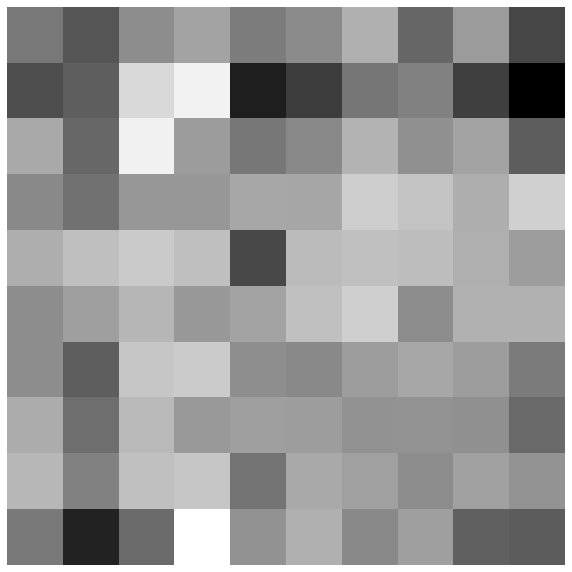

In [73]:
plot(y2[0:10,:])
#plotting fr0m y2 the image of [0:10,:]

In [74]:
y
#showing what y is equal to and all the array of numbers

tensor([0., 6., 0., 9., 6., 5., 4., 7., 8., 0., 7., 0., 3., 2., 4., 8., 1., 3.,
        4., 8., 6., 1., 8., 9., 9., 2., 7., 1., 1., 4., 2., 5., 8., 7., 9., 4.,
        3., 2., 2., 4., 5., 6., 2., 4., 1., 6., 9., 1., 1., 7., 5., 6., 2., 6.,
        1., 6., 0., 8., 5., 0., 8., 5., 3., 7., 8., 1., 8., 2., 9., 4., 8., 9.,
        1., 9., 9., 2., 4., 2., 7., 0., 0., 8., 9., 2., 1., 4., 3., 9., 3., 7.,
        6., 0., 1., 1., 3., 8., 6., 0., 8., 5., 4., 4., 9., 3., 1., 3., 0., 8.,
        3., 6., 7., 2., 2., 8., 0., 4., 0., 3., 2., 5., 6., 0., 7., 4., 0., 9.,
        7., 3., 0., 1., 1., 4., 7., 4., 3., 9., 4., 3., 6., 8., 6., 2., 1., 8.,
        6., 3., 2., 4., 2., 0., 9., 5., 3., 5., 0., 1., 5., 6., 9., 0., 1., 2.,
        2., 4., 2., 9., 2., 5., 6., 3., 7., 2., 6., 6., 1., 9., 7., 0., 5., 7.,
        4., 1., 0., 7., 5., 0., 9., 0., 1., 8., 9., 8., 0., 9., 0., 4., 9., 0.,
        2., 4., 6., 7., 1., 5., 5., 9., 3., 6., 9., 0., 9., 4., 5., 9., 5., 6.,
        7., 3., 6., 4., 6., 8., 4., 5., 

In [75]:
one_hot(y)
#showing what one_hot(y) is equal too and what the tensor is

<ipython-input-25-bf9c7bf19f41>:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(data, requires_grad=False, dtype=torch.float, device=torch.device('cuda'))


tensor([[1., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [1., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 1., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [1., 0., 0.,  ..., 0., 0., 0.]], device='cuda:0')

<ipython-input-25-bf9c7bf19f41>:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(data, requires_grad=False, dtype=torch.float, device=torch.device('cuda'))


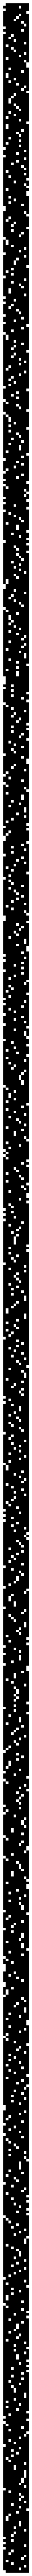

In [76]:
plot(one_hot(y))
#plotting the data from (one_hot(y))

<ipython-input-25-bf9c7bf19f41>:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(data, requires_grad=False, dtype=torch.float, device=torch.device('cuda'))


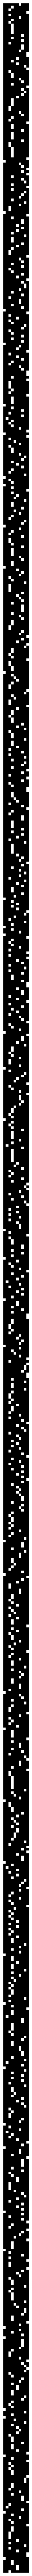

In [77]:
plot(one_hot(torch.argmax(y2,1)))
#plotting the data from one_hot but also with torch.argmax(y2,1)

In [78]:
y
#showing what y is equal to and the array of numbers 

tensor([0., 6., 0., 9., 6., 5., 4., 7., 8., 0., 7., 0., 3., 2., 4., 8., 1., 3.,
        4., 8., 6., 1., 8., 9., 9., 2., 7., 1., 1., 4., 2., 5., 8., 7., 9., 4.,
        3., 2., 2., 4., 5., 6., 2., 4., 1., 6., 9., 1., 1., 7., 5., 6., 2., 6.,
        1., 6., 0., 8., 5., 0., 8., 5., 3., 7., 8., 1., 8., 2., 9., 4., 8., 9.,
        1., 9., 9., 2., 4., 2., 7., 0., 0., 8., 9., 2., 1., 4., 3., 9., 3., 7.,
        6., 0., 1., 1., 3., 8., 6., 0., 8., 5., 4., 4., 9., 3., 1., 3., 0., 8.,
        3., 6., 7., 2., 2., 8., 0., 4., 0., 3., 2., 5., 6., 0., 7., 4., 0., 9.,
        7., 3., 0., 1., 1., 4., 7., 4., 3., 9., 4., 3., 6., 8., 6., 2., 1., 8.,
        6., 3., 2., 4., 2., 0., 9., 5., 3., 5., 0., 1., 5., 6., 9., 0., 1., 2.,
        2., 4., 2., 9., 2., 5., 6., 3., 7., 2., 6., 6., 1., 9., 7., 0., 5., 7.,
        4., 1., 0., 7., 5., 0., 9., 0., 1., 8., 9., 8., 0., 9., 0., 4., 9., 0.,
        2., 4., 6., 7., 1., 5., 5., 9., 3., 6., 9., 0., 9., 4., 5., 9., 5., 6.,
        7., 3., 6., 4., 6., 8., 4., 5., 

In [79]:
torch.argmax(y2,1)
#shwoing the array of numbers that come from torch.argmax(y2,1)

tensor([6, 3, 2, 9, 2, 6, 3, 2, 3, 3, 3, 3, 7, 3, 7, 2, 7, 7, 6, 9, 9, 5, 3, 5,
        8, 9, 2, 3, 3, 6, 7, 3, 9, 7, 8, 7, 5, 3, 3, 3, 2, 2, 6, 7, 3, 2, 9, 3,
        3, 7, 3, 3, 3, 7, 2, 2, 3, 3, 3, 3, 9, 0, 6, 7, 9, 7, 9, 3, 7, 8, 3, 9,
        3, 8, 7, 6, 3, 8, 6, 2, 2, 0, 9, 3, 7, 7, 5, 7, 5, 3, 8, 3, 3, 7, 5, 3,
        2, 2, 9, 6, 7, 3, 7, 2, 3, 7, 5, 9, 7, 8, 8, 6, 3, 7, 2, 6, 6, 3, 7, 0,
        9, 2, 5, 2, 3, 8, 7, 2, 3, 7, 3, 7, 0, 6, 5, 9, 2, 5, 7, 3, 2, 6, 7, 9,
        9, 3, 9, 2, 2, 2, 3, 2, 9, 3, 3, 3, 0, 3, 7, 2, 7, 1, 3, 2, 3, 6, 9, 0,
        9, 2, 4, 6, 2, 3, 3, 6, 8, 7, 3, 5, 7, 3, 2, 8, 0, 2, 3, 0, 3, 9, 3, 5,
        4, 8, 3, 3, 7, 4, 6, 3, 2, 8, 7, 0, 6, 3, 2, 7, 2, 2, 3, 7, 3, 3, 3, 6,
        7, 3, 3, 0, 5, 7, 6, 2, 3, 8, 2, 2, 2, 7, 5, 6, 7, 3, 7, 7, 7, 3, 6, 7,
        3, 3, 2, 2, 7, 6, 9, 7, 5, 9, 8, 3, 3, 2, 3, 9, 2, 2, 3, 3, 0, 3, 4, 5,
        3, 2, 2, 9, 8, 3, 4, 2, 2, 9, 5, 3, 3, 2, 3, 3, 7, 5, 8, 2, 3, 3, 8, 3,
        3, 5, 2, 7, 2, 8, 3, 8, 7, 3, 9,

In [80]:
b
#showing what b is equal to

1000

In [81]:
torch.sum(y == torch.argmax(y2,1))/b
#creating a tensor using torch.sum(y==torch.argmax(y2,1))/b

tensor(0.0810, device='cuda:0')

In [82]:
X.shape
#showing what X.shape is equal to

torch.Size([60000, 784])

In [83]:
%%timeit
X[20000]@W
# showing the standard deviation and mean per loop of 2000 loops

27.5 µs ± 1.38 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [84]:
torch.argmax(X@W,1)
#creating a tensor using torch.argmax(X@W,1)

tensor([5, 2, 3,  ..., 2, 2, 5], device='cuda:0')

In [85]:
Y
#showing what  Y is equal to

tensor([8., 7., 0.,  ..., 0., 4., 9.], device='cuda:0')

In [86]:
torch.sum(torch.argmax(X@W,1) == Y)/60000
#creating a tensor by dividing 6000 from torch.argmax(X@W,1)==Y

tensor(0.0789, device='cuda:0')

In [87]:
X@W
#showing what data comes from X@W

tensor([[ -6.7411, -30.6675,  -4.6133,  ..., -18.6603, -21.3336, -11.8581],
        [ -9.2111, -17.2542,   3.0195,  ..., -13.0820, -15.9574,  -3.6528],
        [ -9.9539, -32.6373, -11.0621,  ..., -16.7772, -22.7081, -39.3788],
        ...,
        [-13.9413, -34.4255,  12.8566,  ..., -17.9977, -24.1829, -36.7925],
        [-20.0897, -28.0183,  11.9711,  ..., -14.0910,  -9.7690, -29.2732],
        [ -8.3954, -21.9395,   1.6386,  ..., -20.9600,  -7.4672,  -9.4834]],
       device='cuda:0', grad_fn=<MmBackward0>)

In [88]:
W.shape
#torch size of W.shape

torch.Size([784, 10])

In [89]:
W[:,0].shape
#torch size of W[:,0].shape

torch.Size([784])

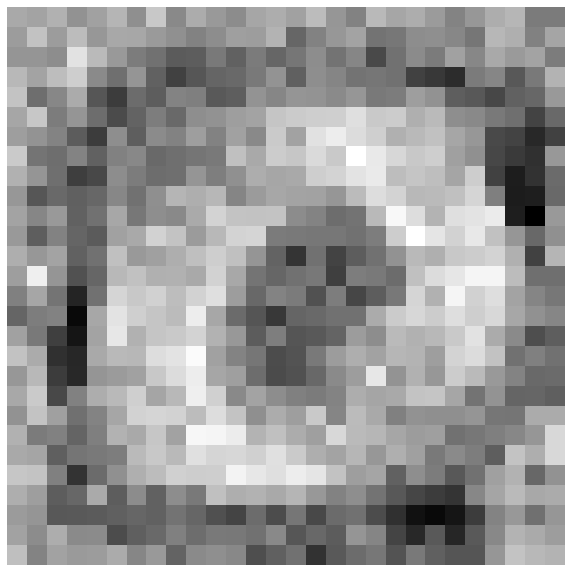

In [90]:
plot(W[:,0].reshape(28,28))
#plotting the number that falls into spot 0 into an image and shaping it with 28 by 28

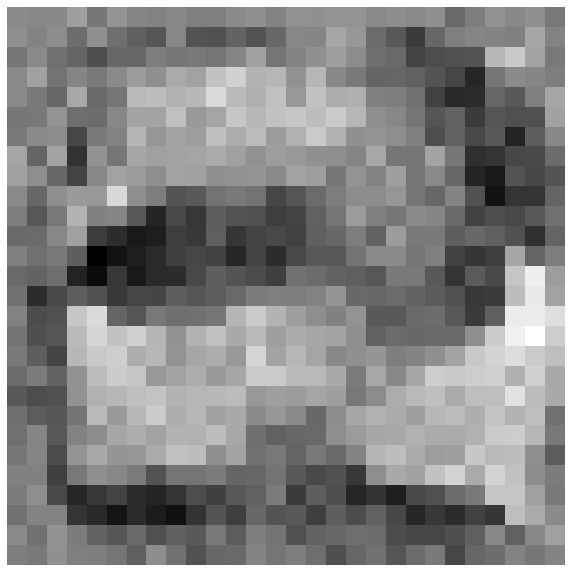

In [91]:
plot(W[:,2].reshape(28,28))
#plotting the number that falls into spot 2 into an image and shaping it with 28 by 28

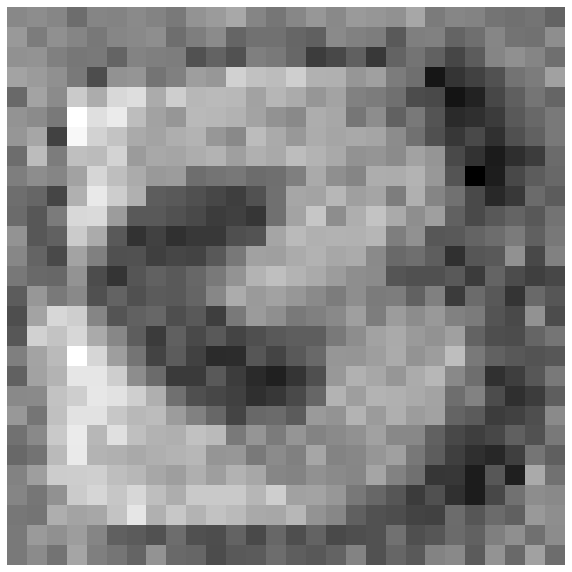

In [92]:
plot(W[:,3].reshape(28,28))
#plotting the number that falls into spot 3 into an image and shaping it with 28 by 28

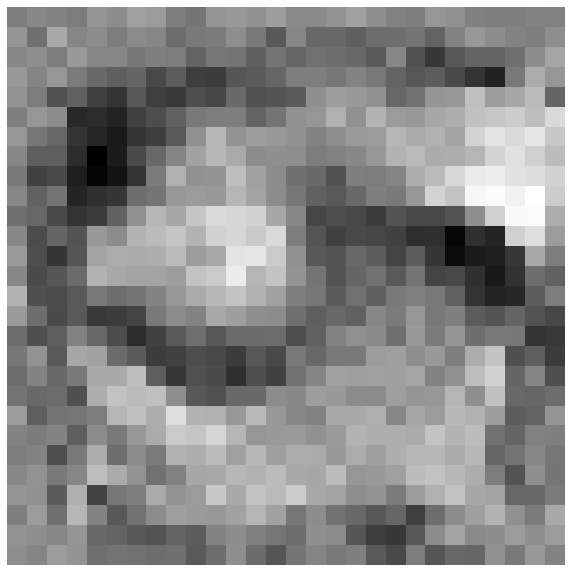

In [93]:
plot(W[:,5].reshape(28,28))
#plotting the number that falls into spot 5 into an image and shaping it with 28 by 28

In [94]:
W.shape
#shwoing the torch size of W.shape

torch.Size([784, 10])

In [95]:
(W.T).shape
#showing thr torch size of (W.T).shape

torch.Size([10, 784])

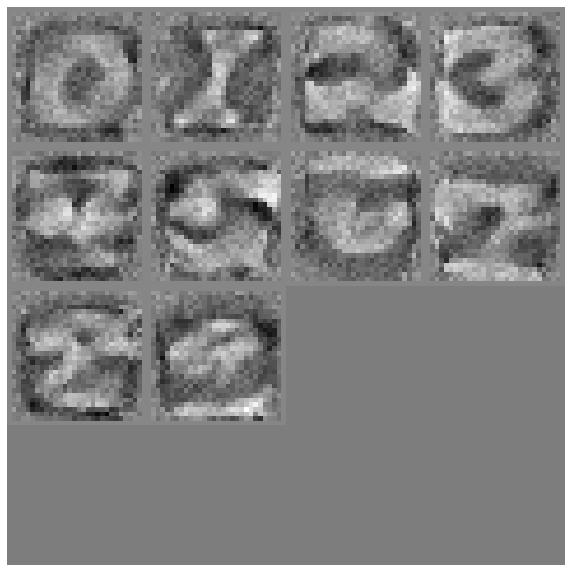

In [96]:
montage_plot((W.T).reshape(10,28,28).cpu().detach().numpy())
#creating a montage of images from 10 numbers and shaping it 28 by 28

In [97]:
###################################################

In [98]:
%%html
<img src ='https://miro.medium.com/max/1906/1*ReYpdIZ3ZSAPb2W8cJpkBg.jpeg'>

In [99]:
%%html
<img src = 'https://miro.medium.com/max/3648/1*wz59MnXkXdWxrq_fkA2wew.png'>

In [100]:
def softmax(x):
    s1 = torch.exp(x - torch.max(x,1)[0][:,None])
    s = s1 / s1.sum(1)[:,None]
    return s
#defining softmax(x) and returning x

In [101]:
def cross_entropy(outputs, labels):            
    return -torch.sum(softmax(outputs).log()[range(outputs.size()[0]), labels.long()])/outputs.size()[0]  
#defining cross_entropy(outputs, labels) and returning torch.sum(softmax(outputs).log()[range(outputs.size()[0]), labels.long()])/outputs.size()[0]

In [102]:
%%html
<img src ='https://i.stack.imgur.com/fXqXs.png'> 

In [103]:
def randn_trunc(s): #Truncated Normal Random Numbers
    mu = 0 
    sigma = 0.1
    R = stats.truncnorm((-2*sigma - mu) / sigma, (2*sigma - mu) / sigma, loc=mu, scale=sigma)
    return R.rvs(s)
#defining randn_trunc(s), assigning mu to equal 0, sigma to equal 0.1, and assigning R to and equation, then returning R.rvs(s)

In [104]:
def Truncated_Normal(size):

    u1 = torch.rand(size)*(1-np.exp(-2)) + np.exp(-2)
    u2 = torch.rand(size)
    z  = torch.sqrt(-2*torch.log(u1)) * torch.cos(2*np.pi*u2)

    return z
#defining Truncated_Normal(size), assigning equations to u1, u2, and z, then returning z

In [105]:
def acc(out,y):
    with torch.no_grad():
        return (torch.sum(torch.max(out,1)[1] == y).item())/y.shape[0]
#defining acc(out,y) and returning (torch.sum(torch.max(out,1)[1] == y).item())/y.shape[0]

In [106]:
X.shape
#showing the torch size of X.shape

torch.Size([60000, 784])

In [107]:
def get_batch(mode):
    b = c.b
    if mode == "train":
        r = np.random.randint(X.shape[0]-b) 
        x = X[r:r+b,:]
        y = Y[r:r+b]
    elif mode == "test":
        r = np.random.randint(X_test.shape[0]-b)
        x = X_test[r:r+b,:]
        y = Y_test[r:r+b]
    return x,y
#defining get_batch(mode), assigning r, x, and y to equations if mode == train. elif mode == train then r, x, and y still remain the same, and then return x,y

In [108]:
def model(x,w):

    return x@w[0]
#defining model(x,w) and returning x@w[0]

In [109]:
def make_plots():
    
    acc_train = acc(model(x,w),y)
    
    xt,yt = get_batch('test')

    acc_test = acc(model(xt,w),yt)

    wb.log({"acc_train": acc_train, "acc_test": acc_test})
    #defining make_plots, and assigning acc_train, xt,yt, acc_test to different equations

<IPython.core.display.Javascript object>

wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


<ipython-input-25-bf9c7bf19f41>:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(data, requires_grad=True, dtype=torch.float, device=torch.device('cuda'))


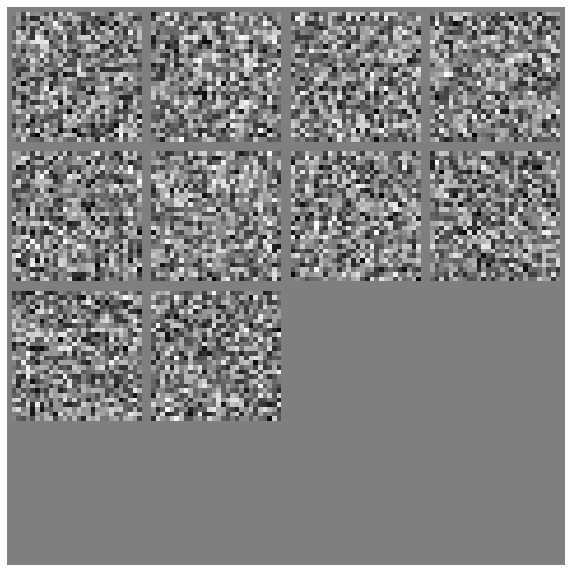

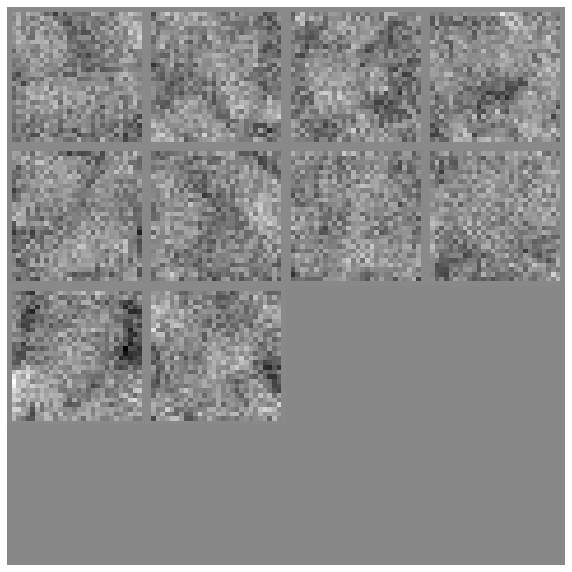

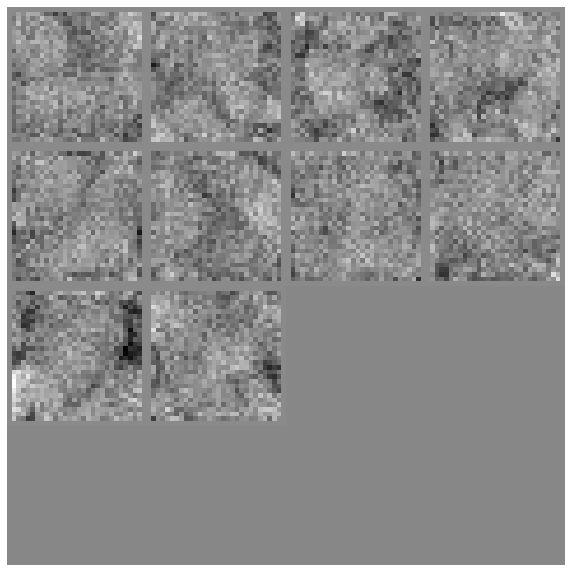

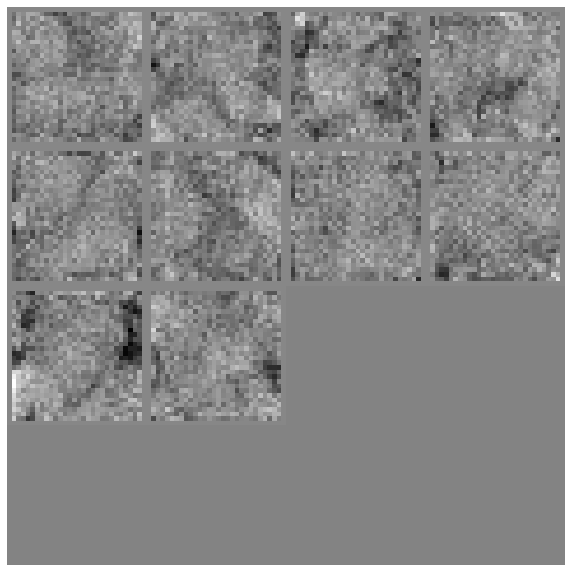

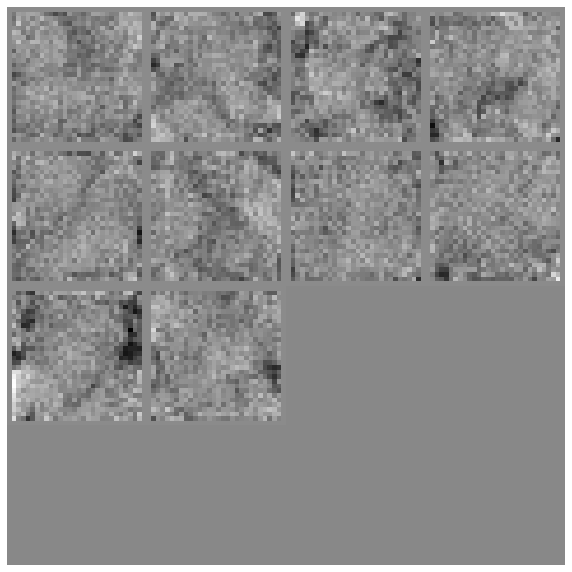

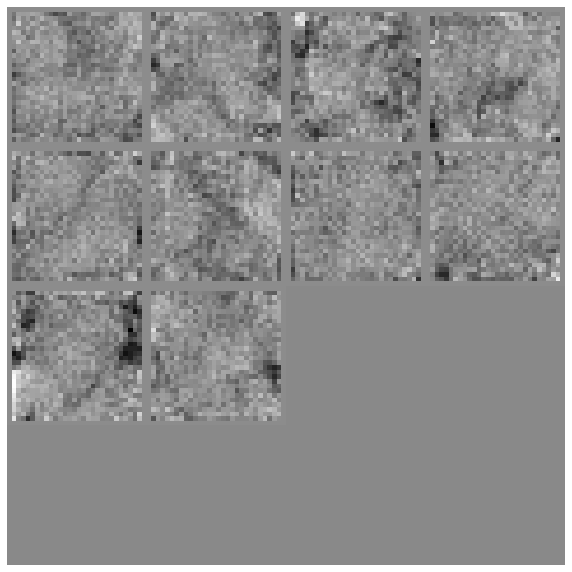

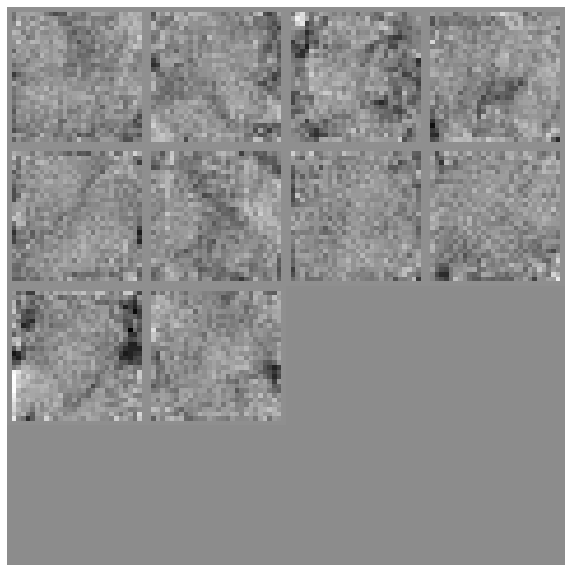

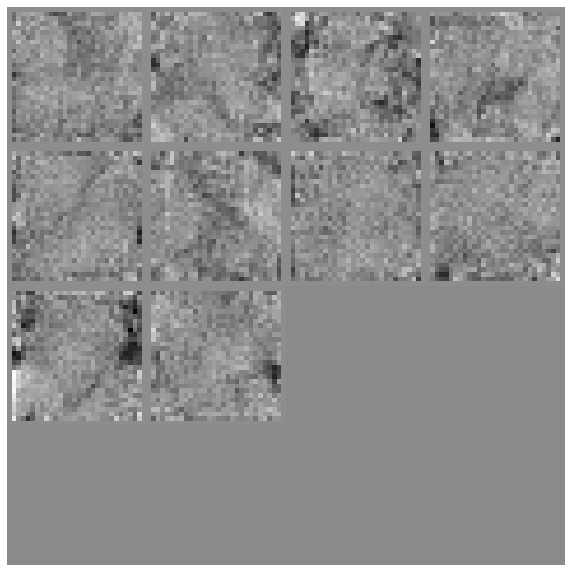

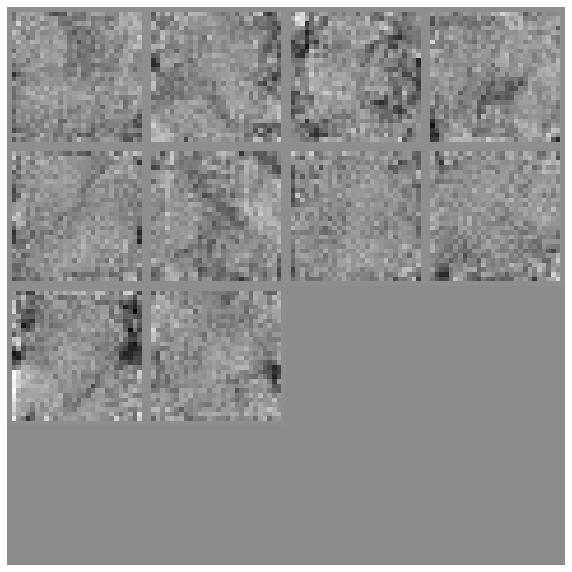

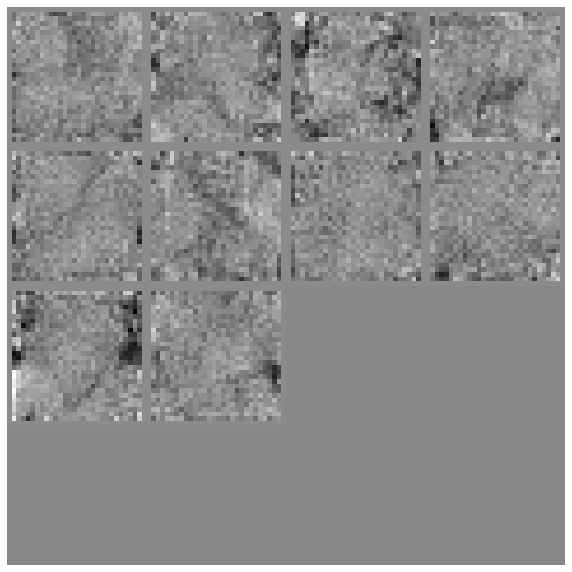

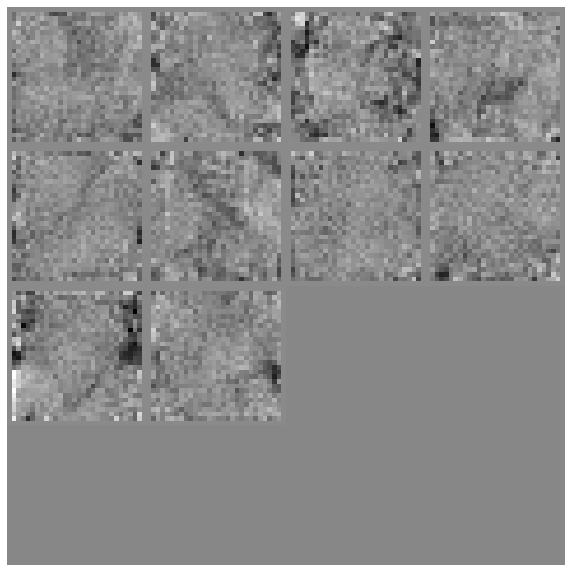

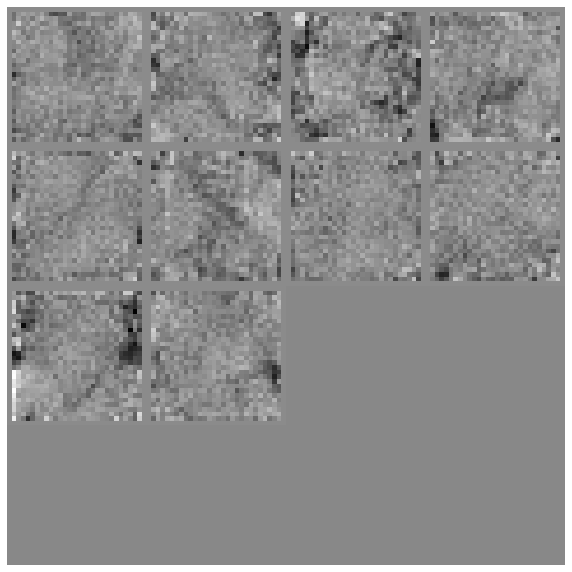

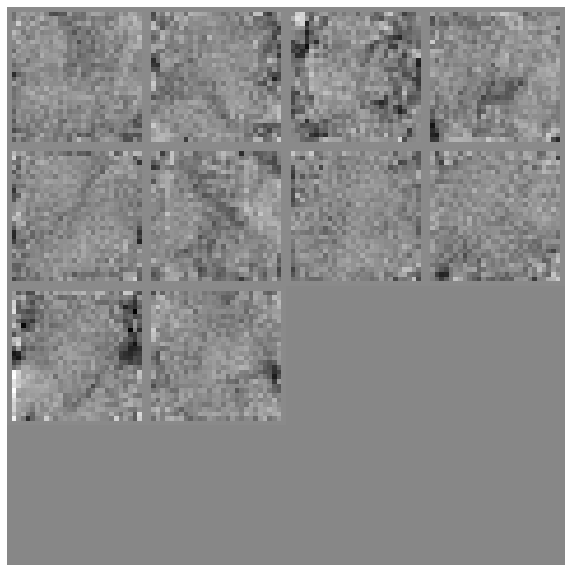

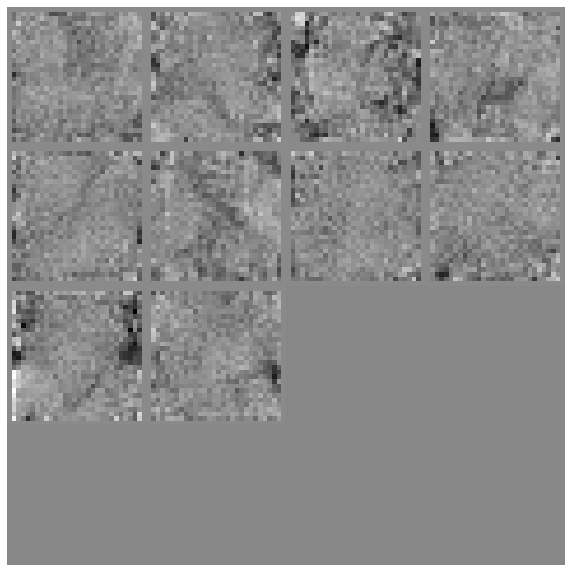

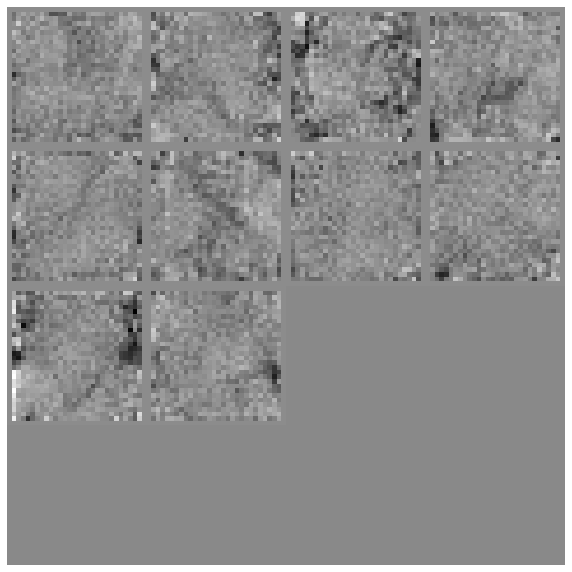

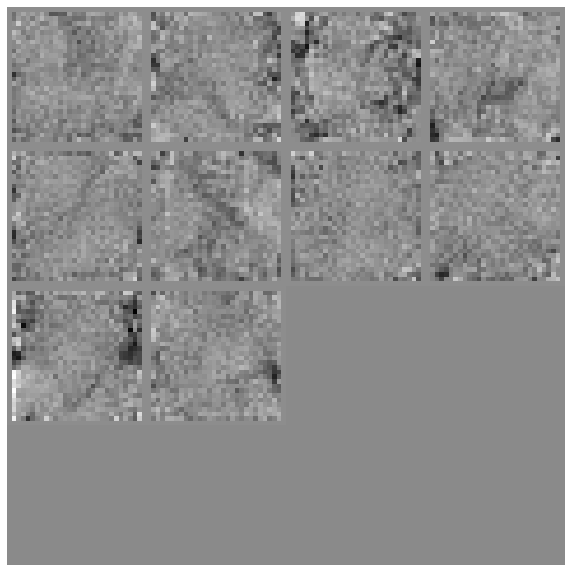

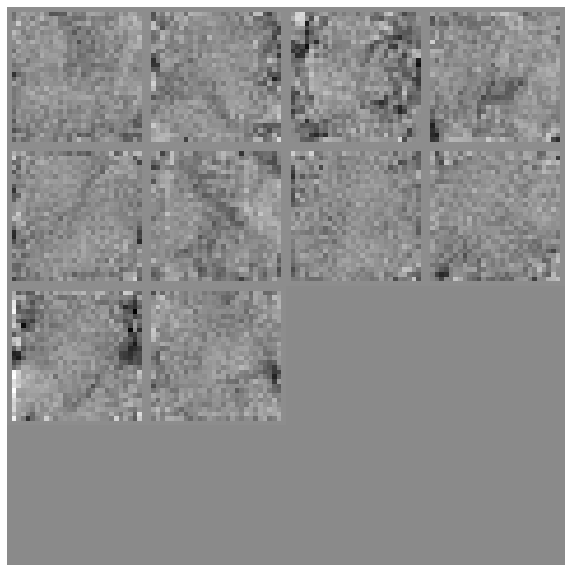

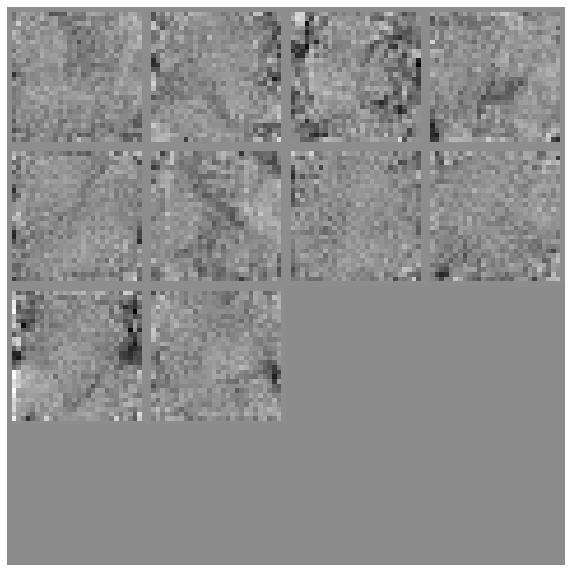

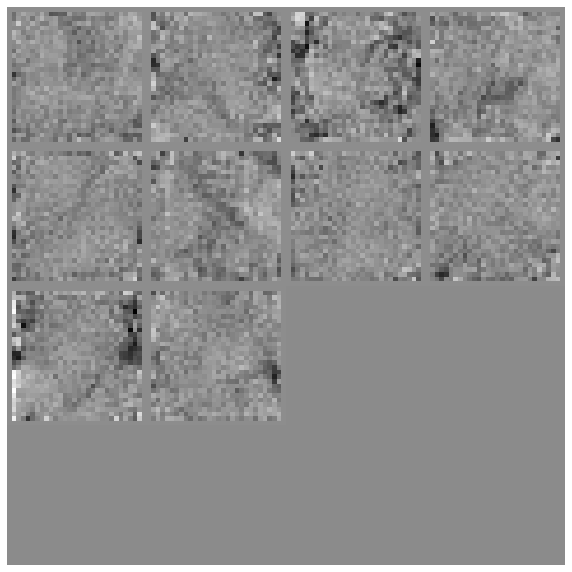

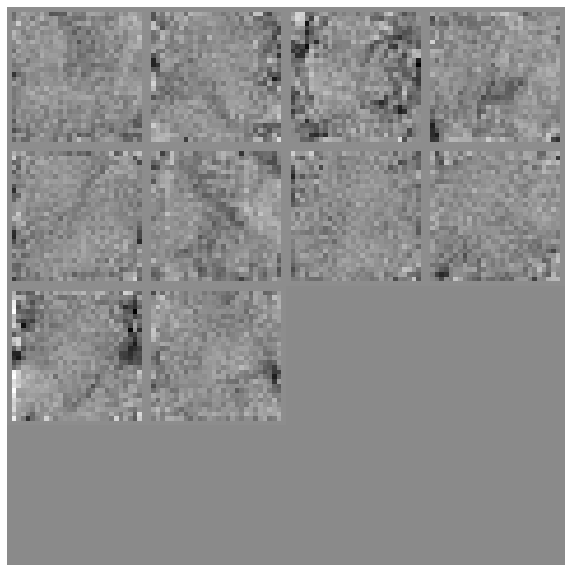

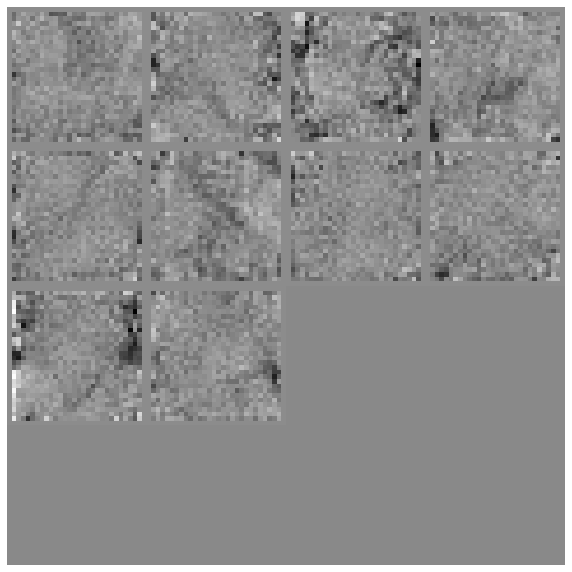

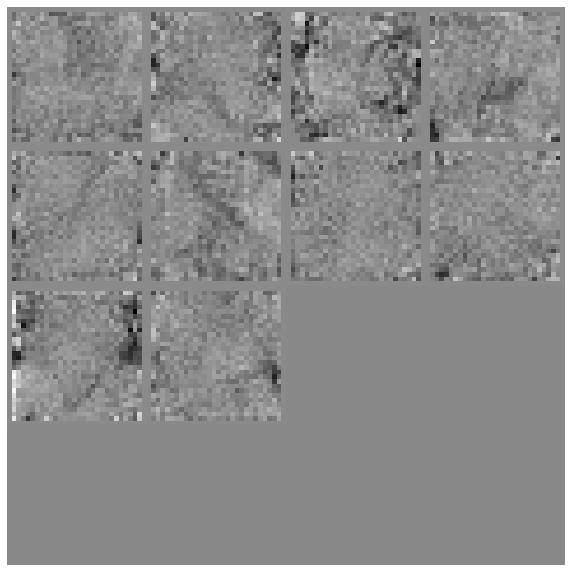

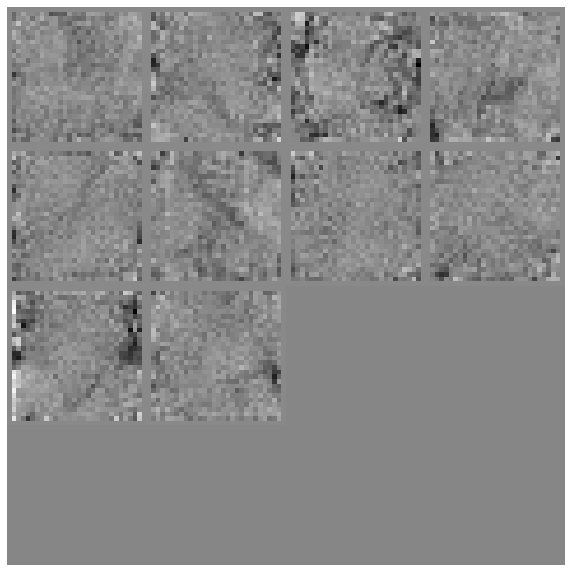

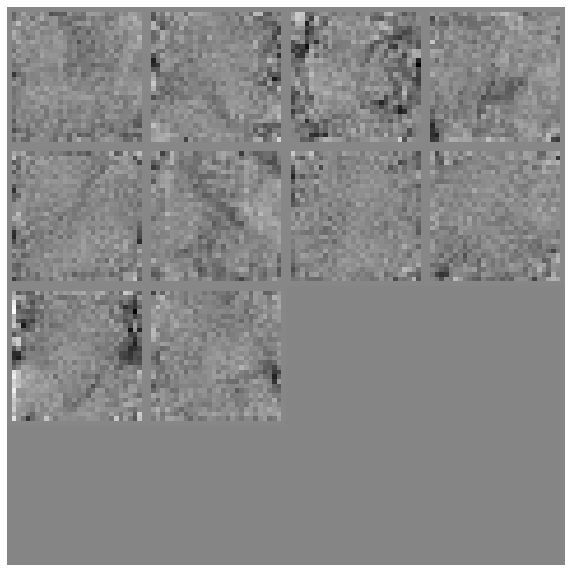

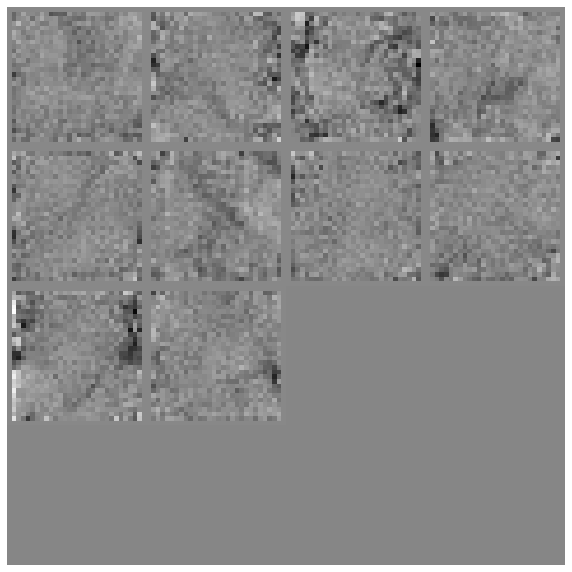

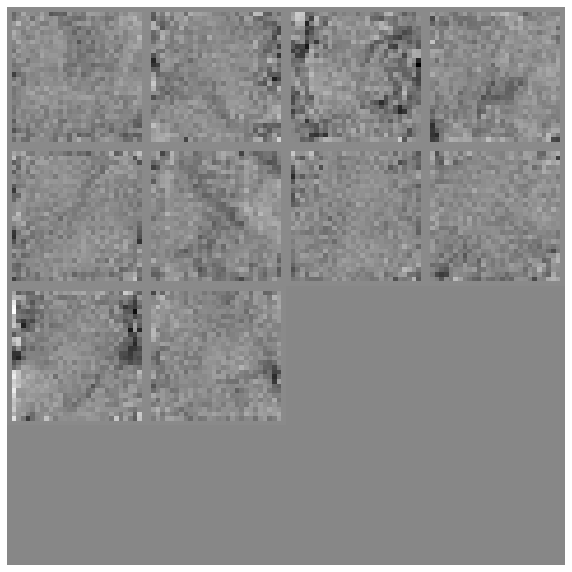

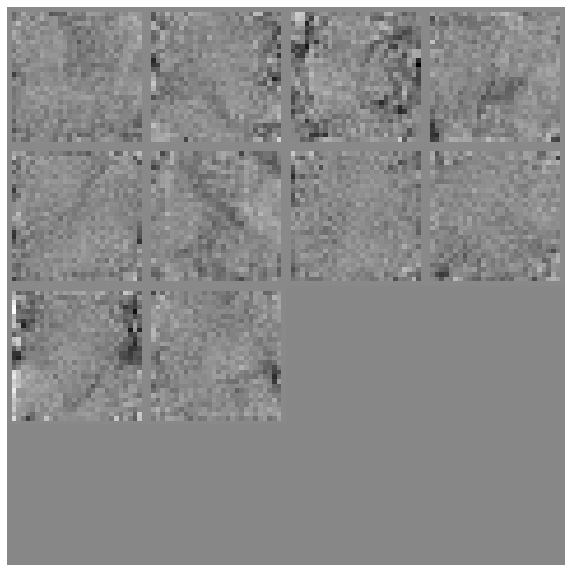

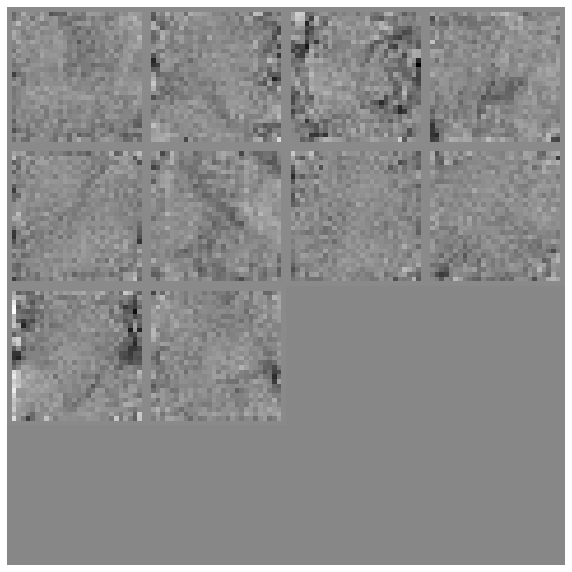

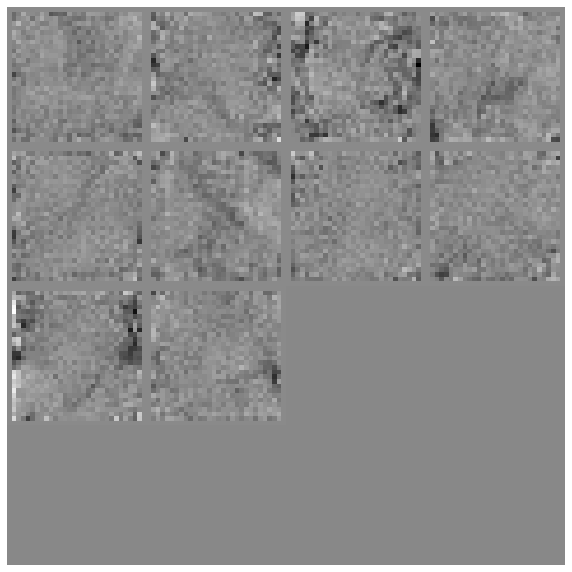

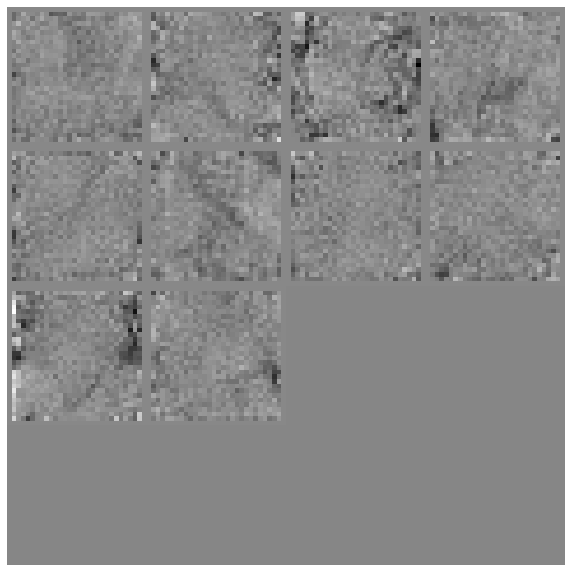

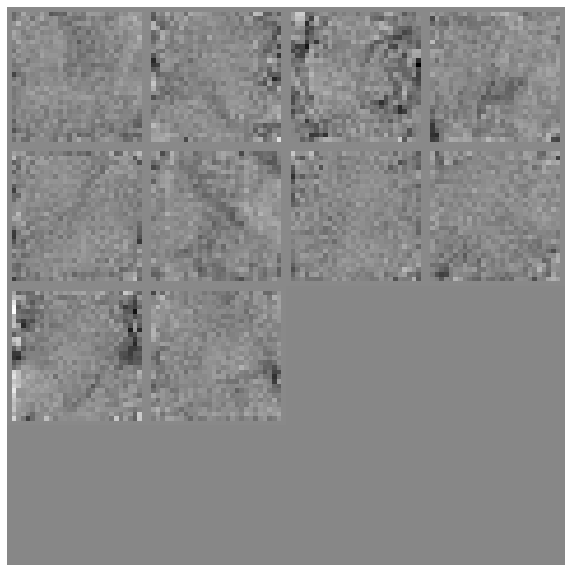

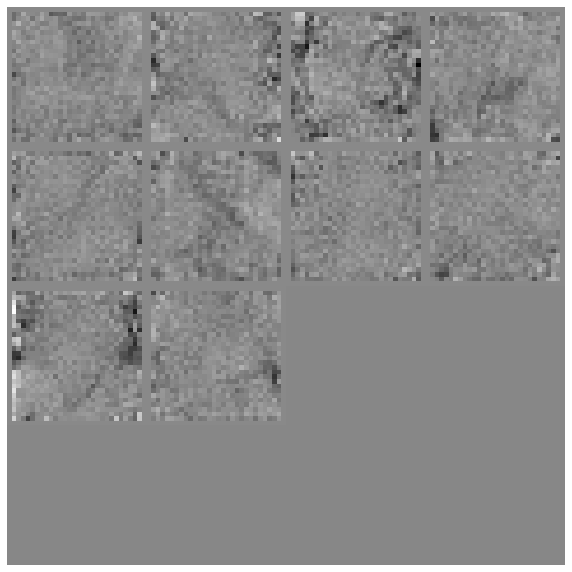

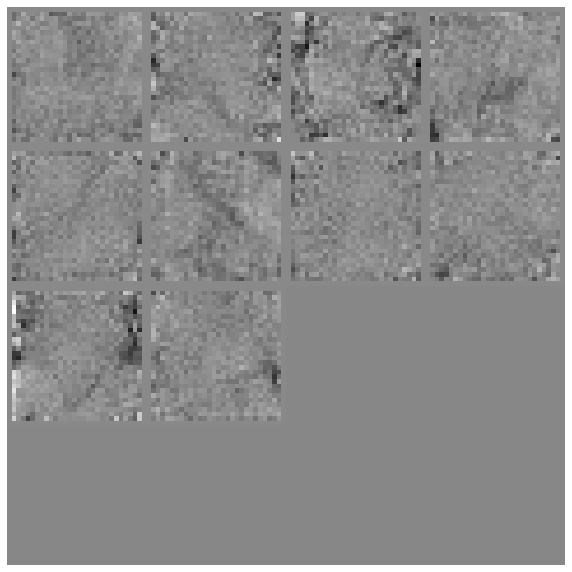

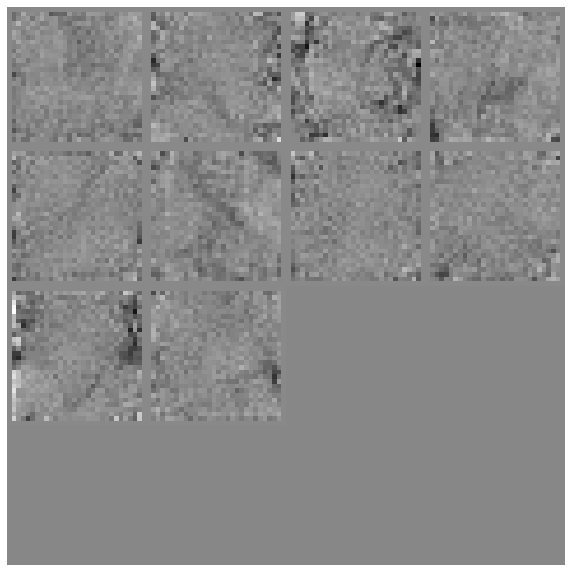

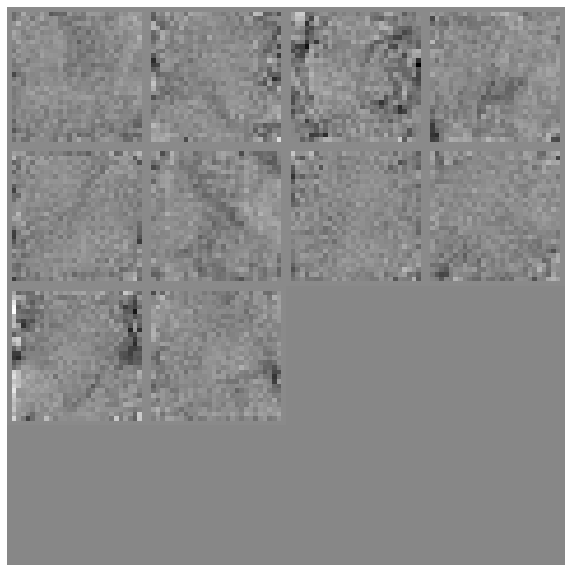

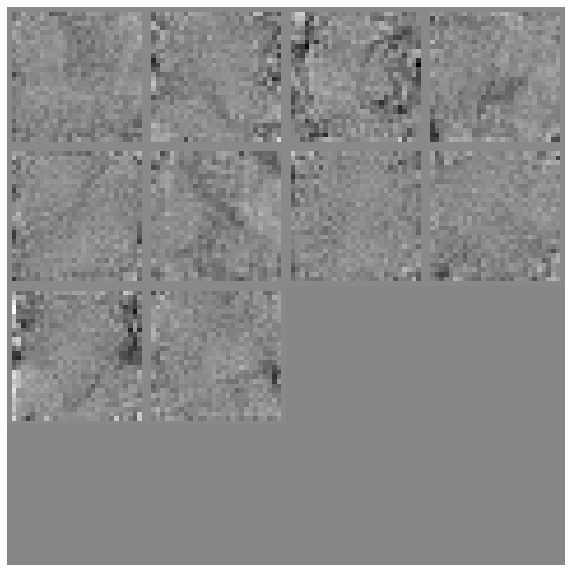

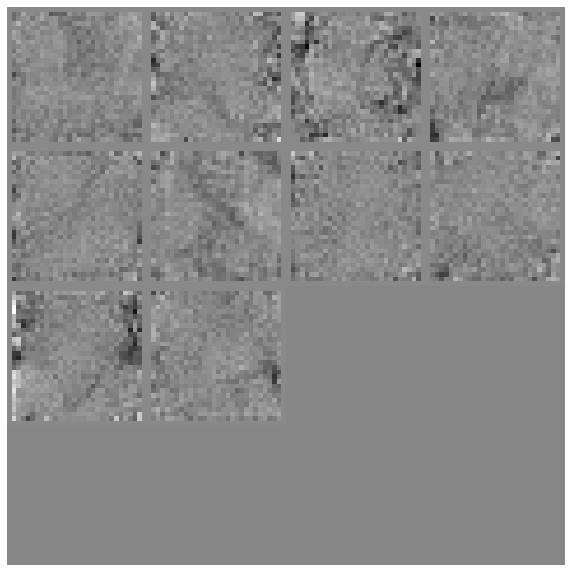

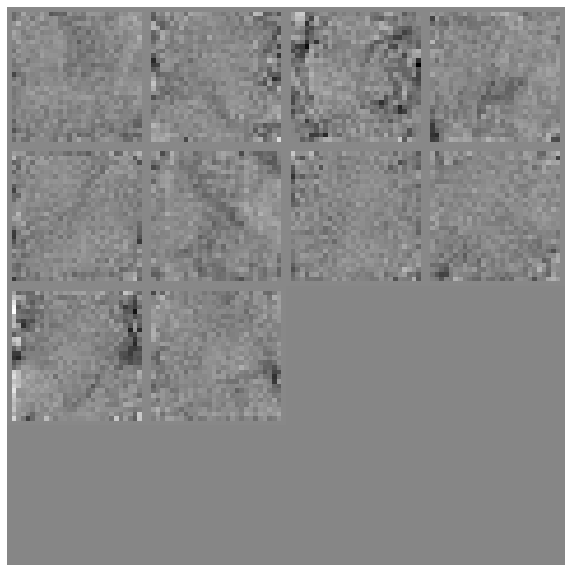

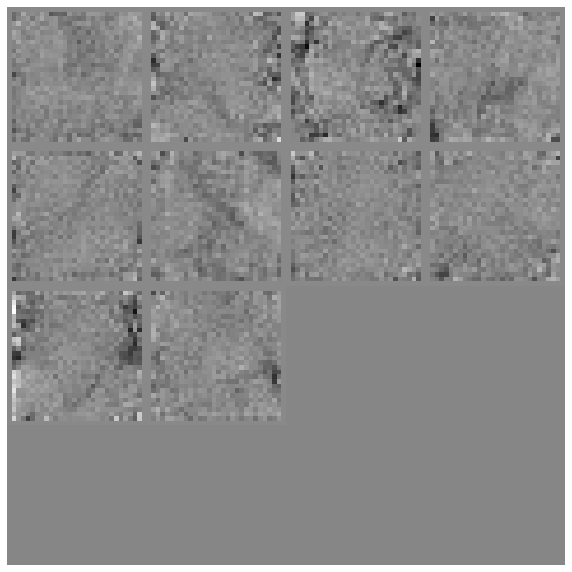

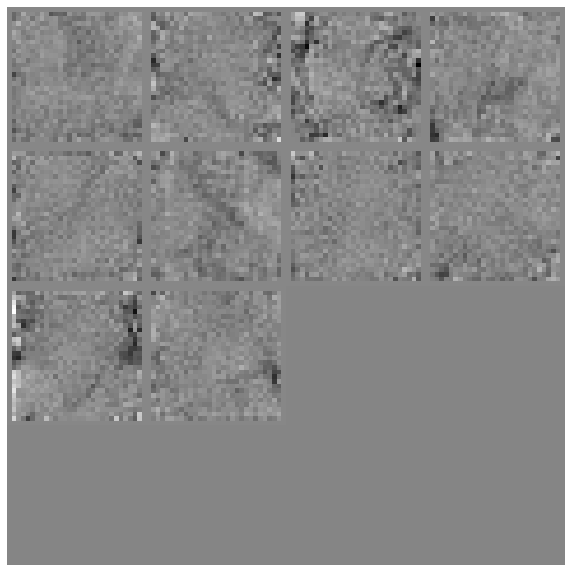

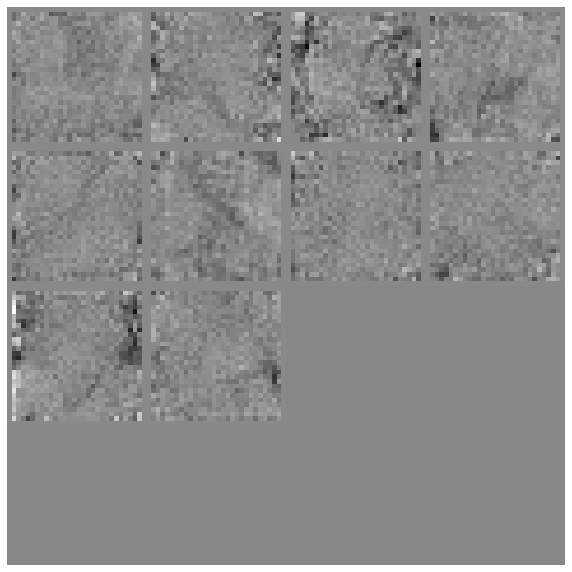

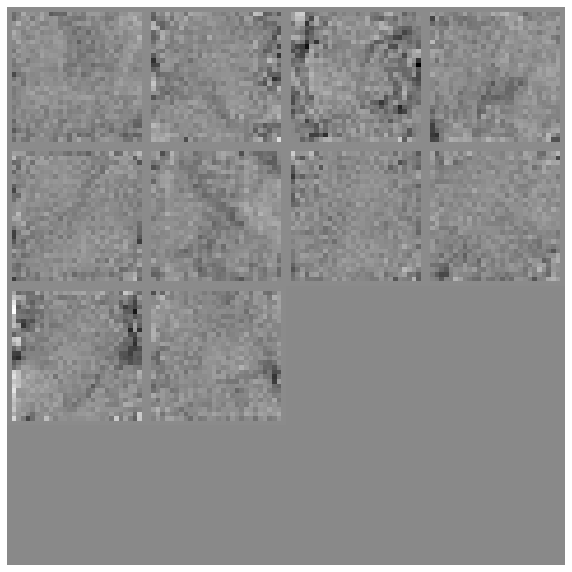

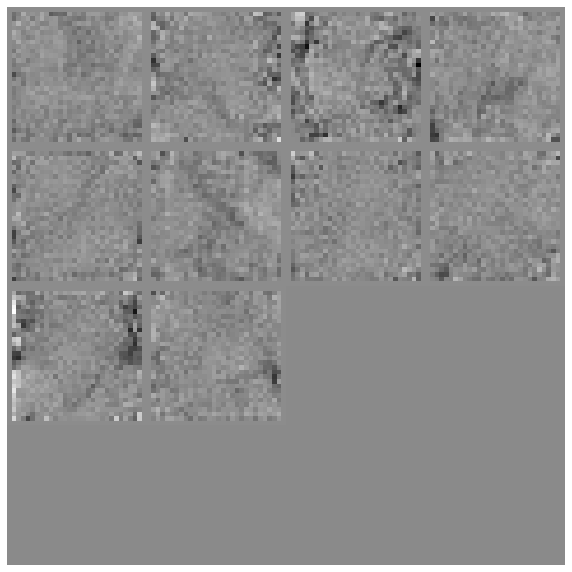

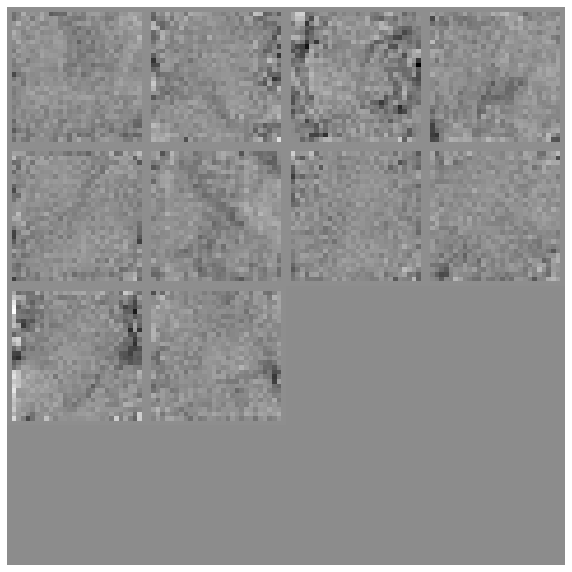

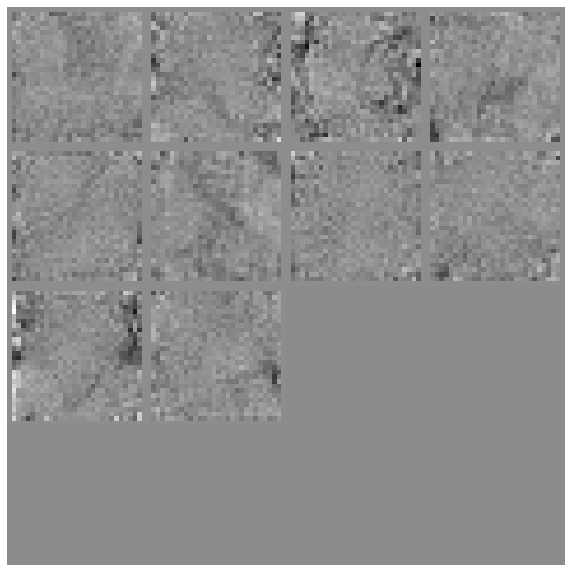

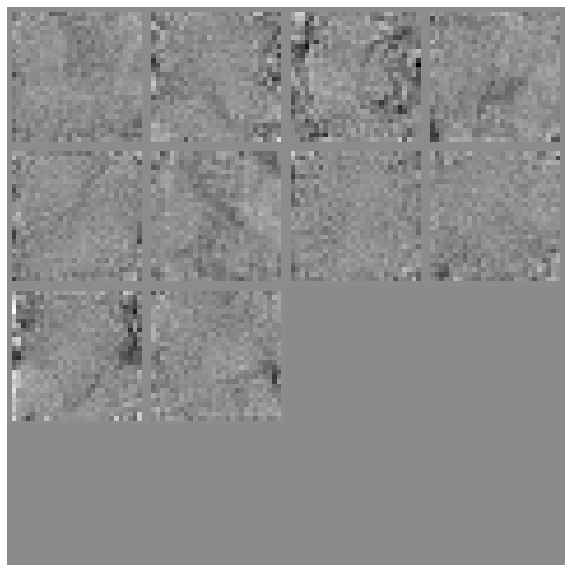

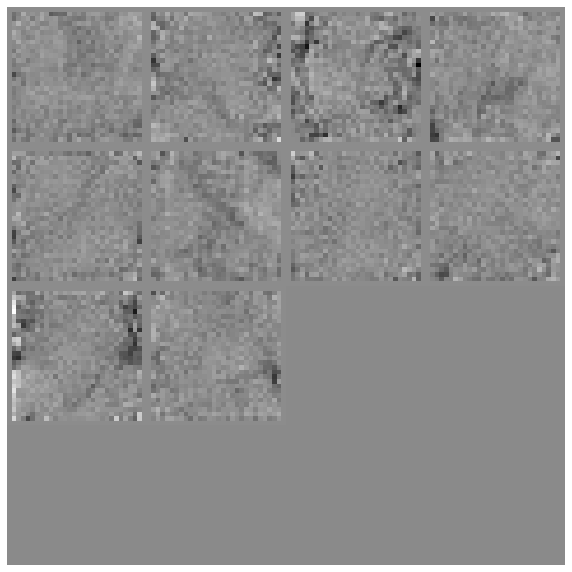

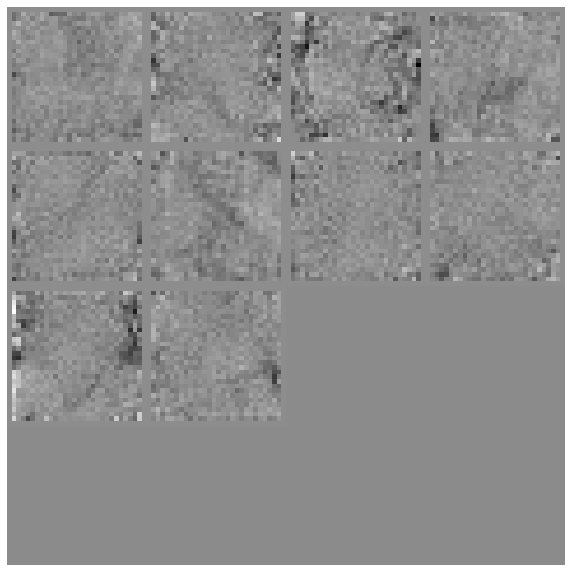

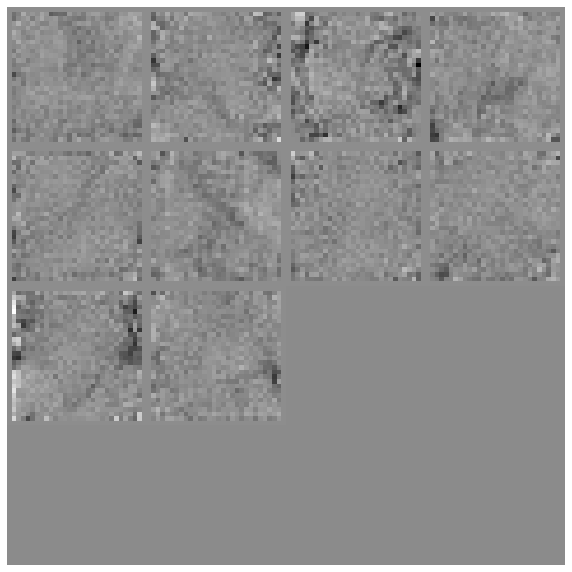

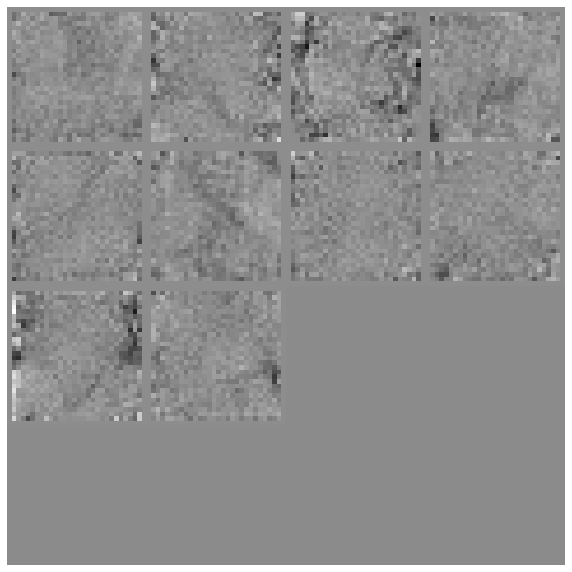

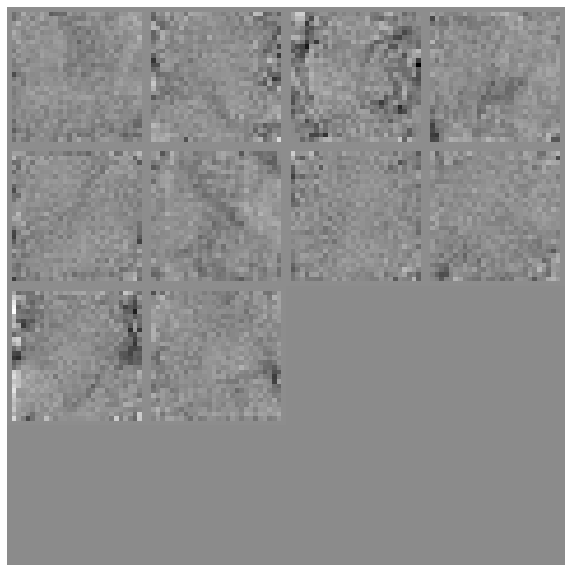

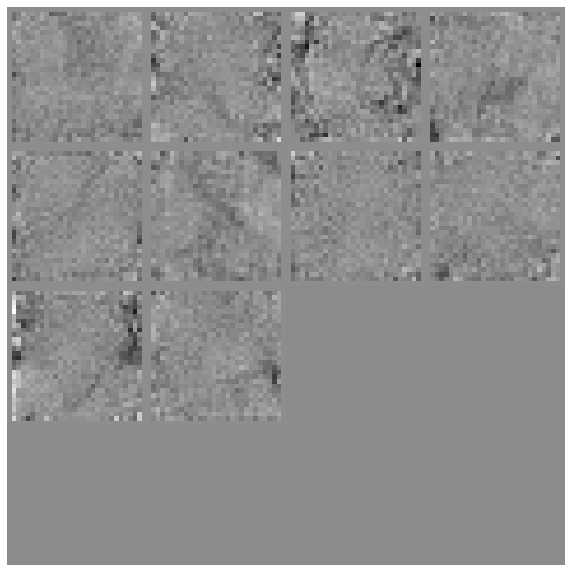

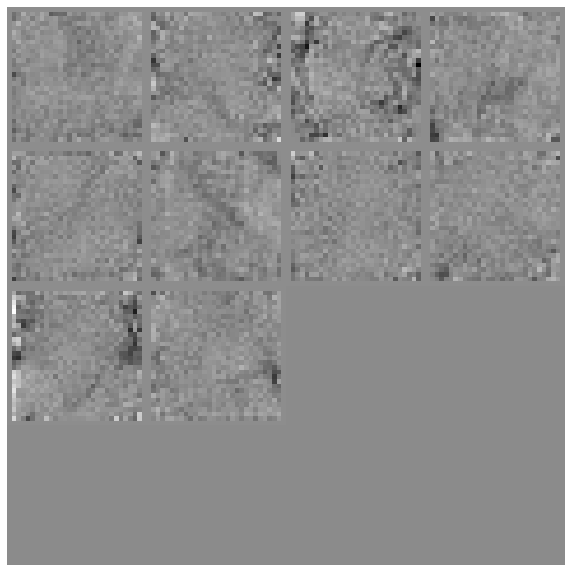

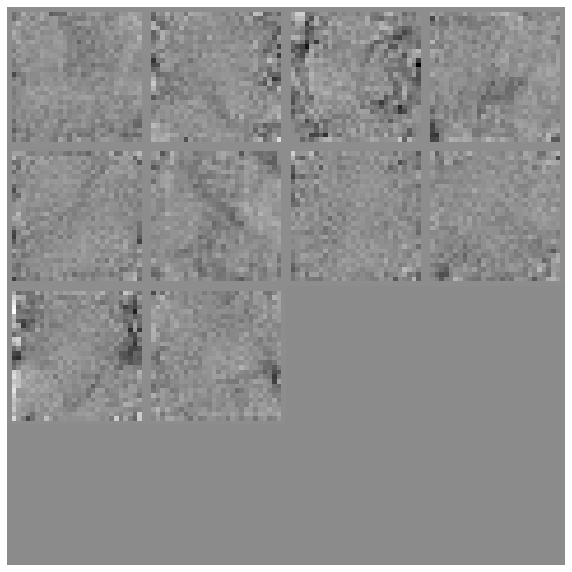

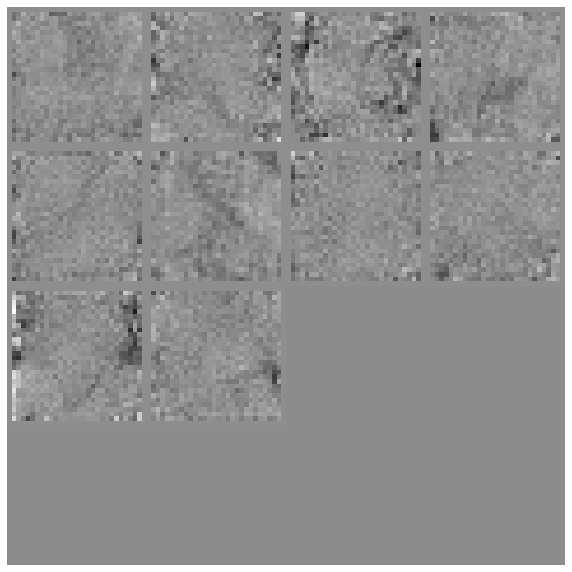

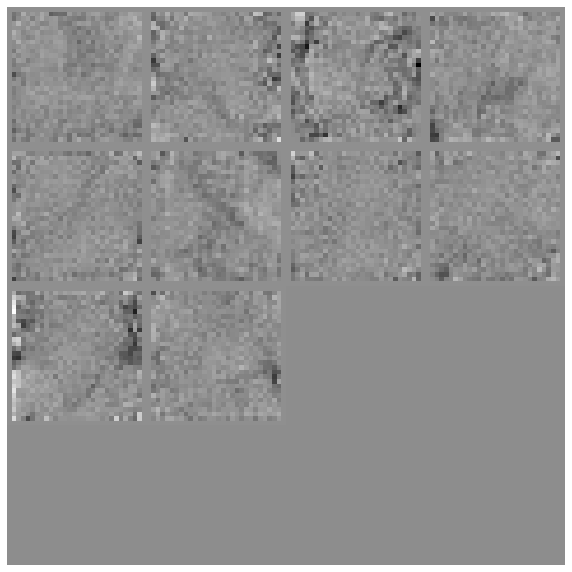

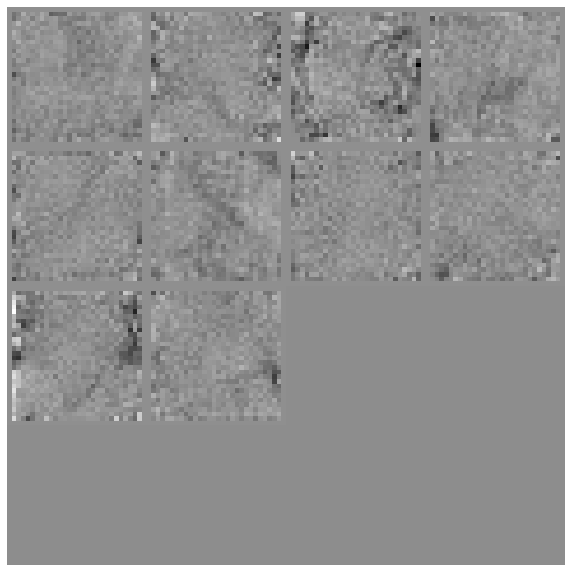

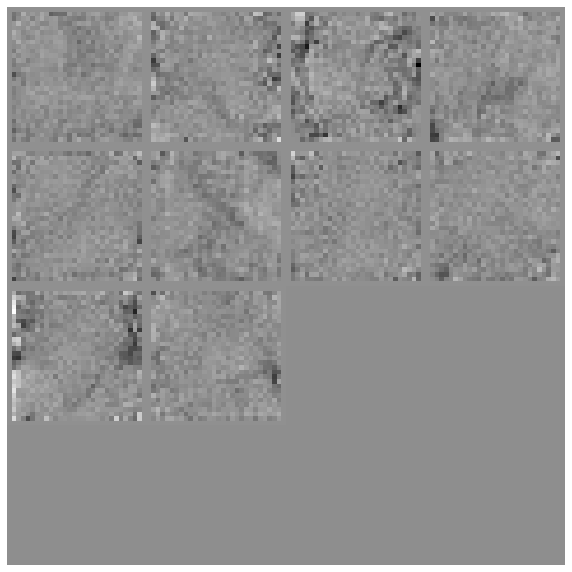

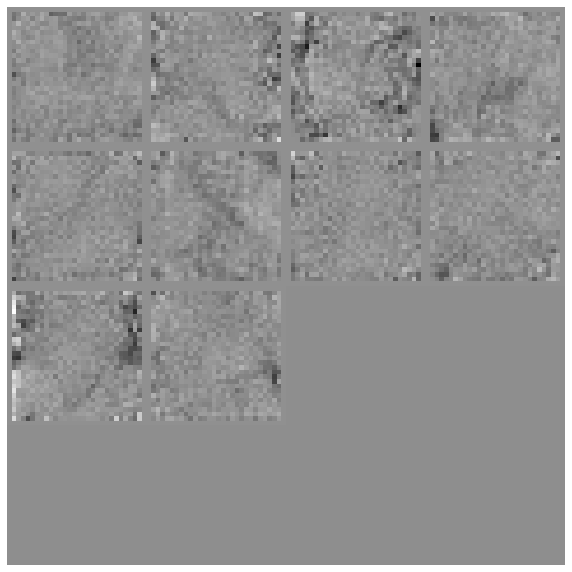

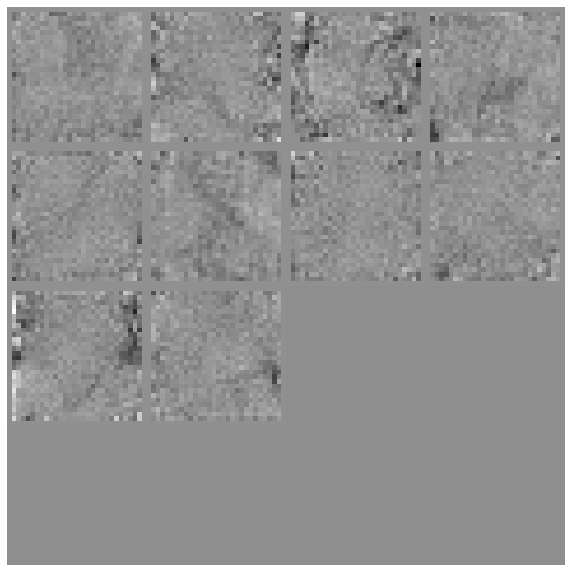

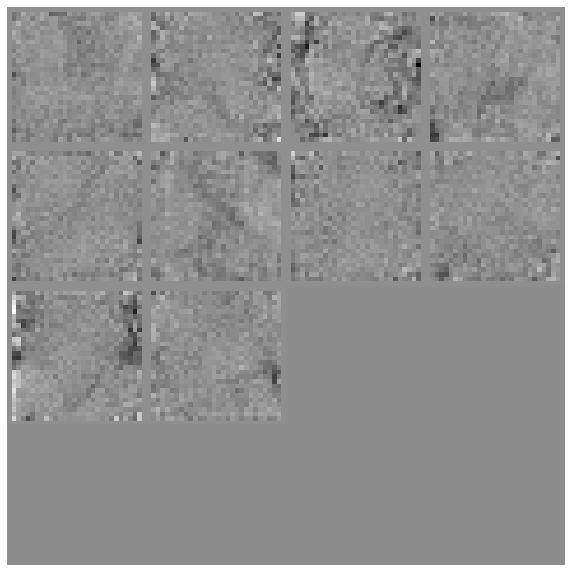

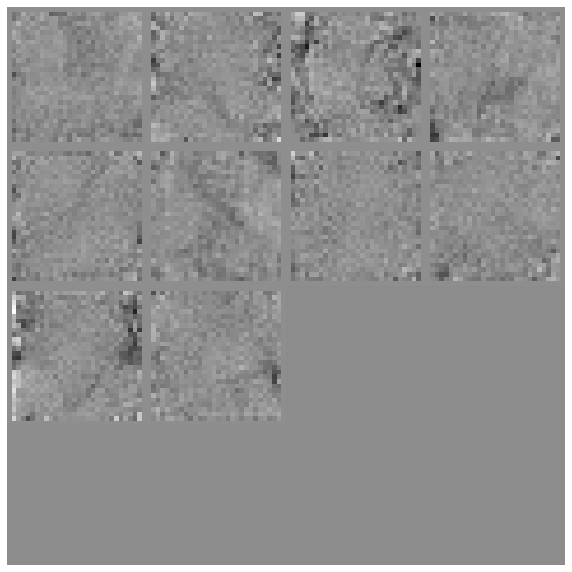

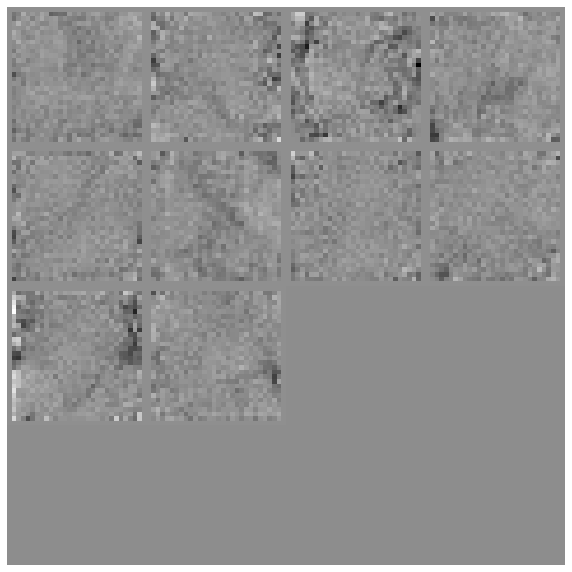

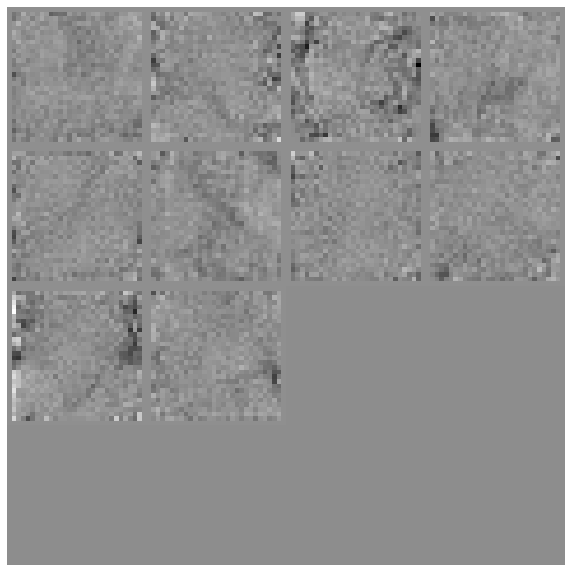

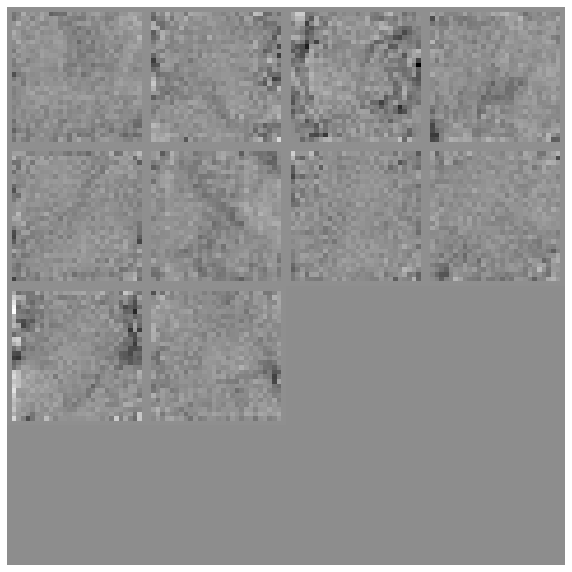

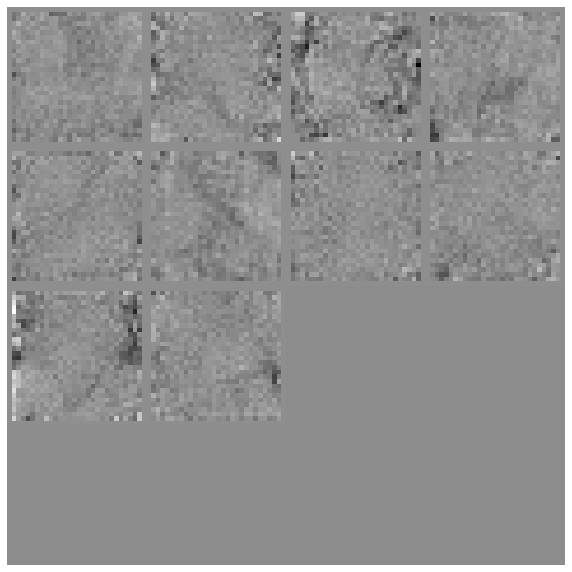

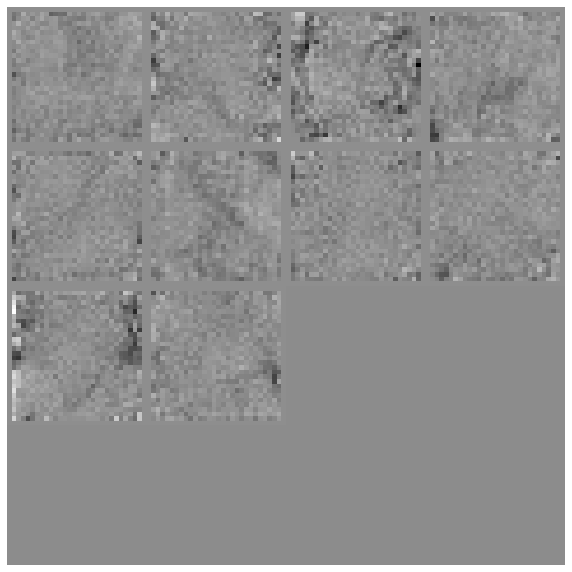

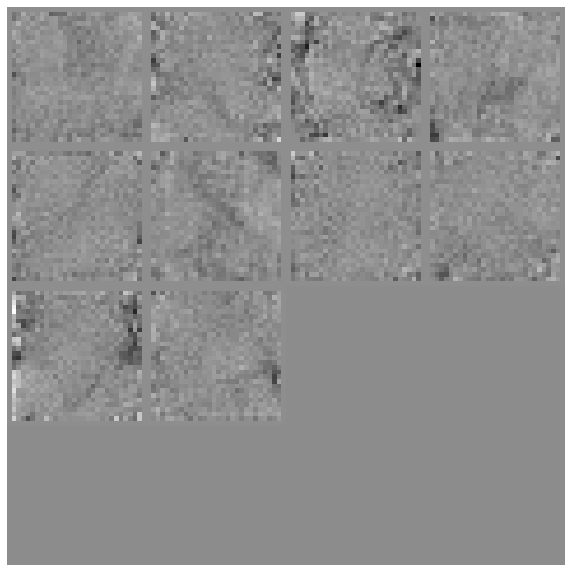

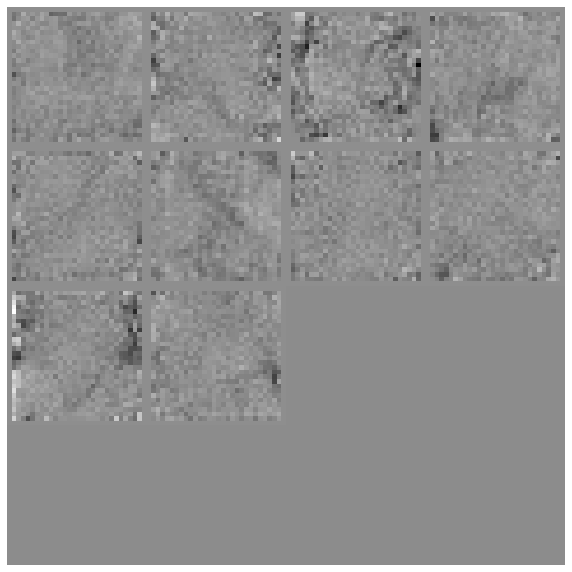

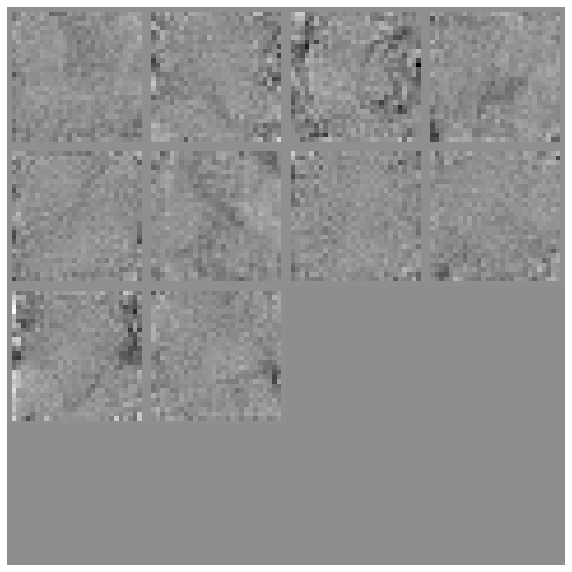

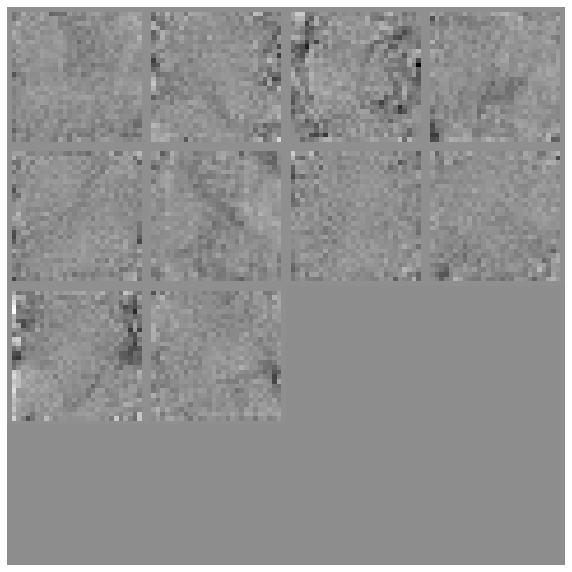

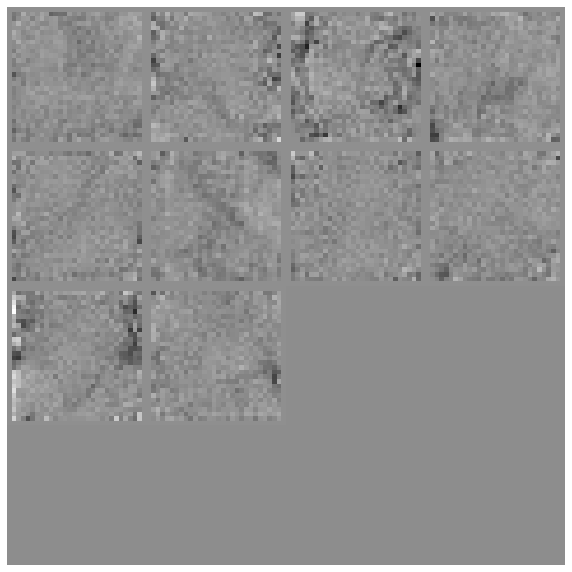

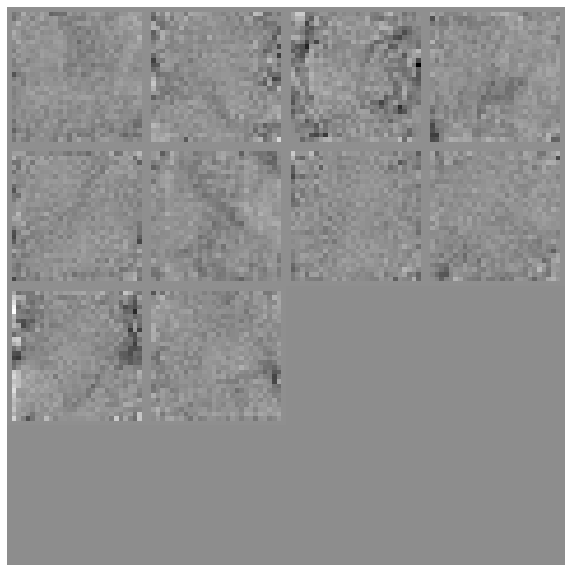

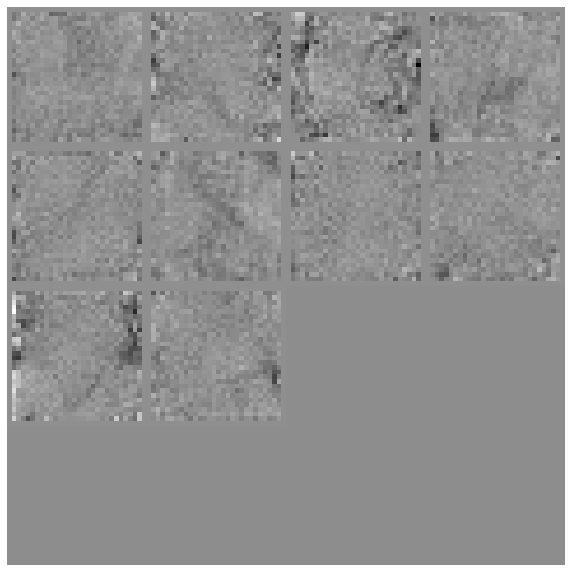

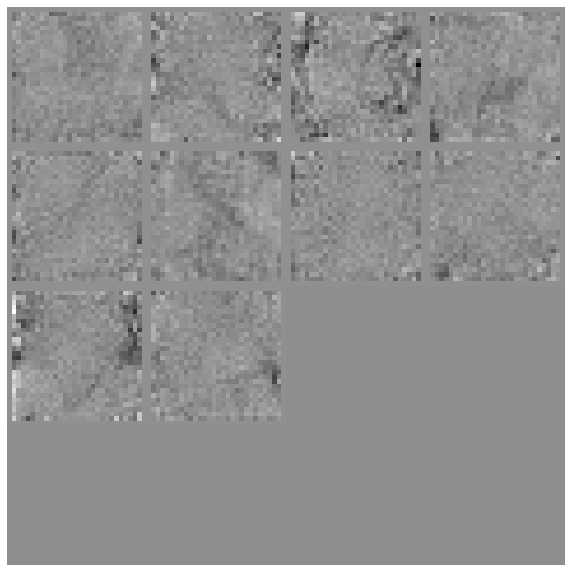

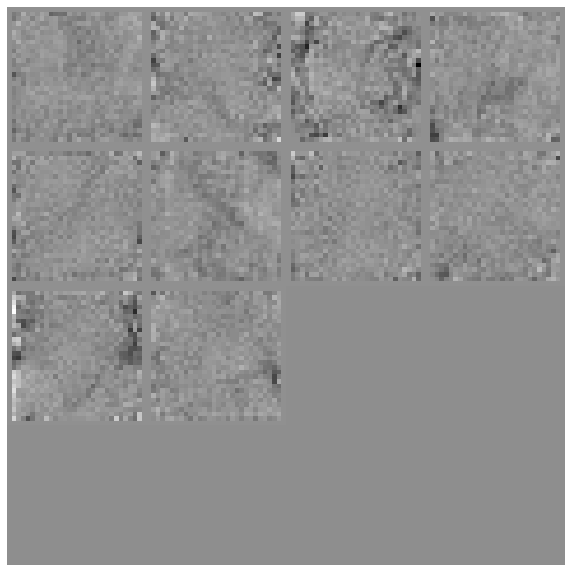

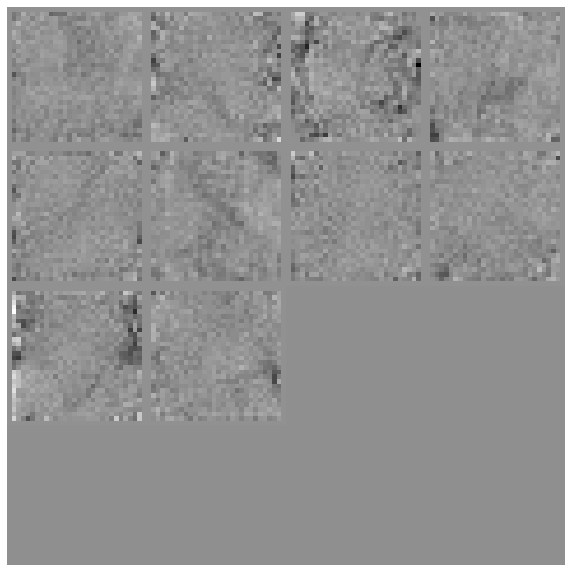

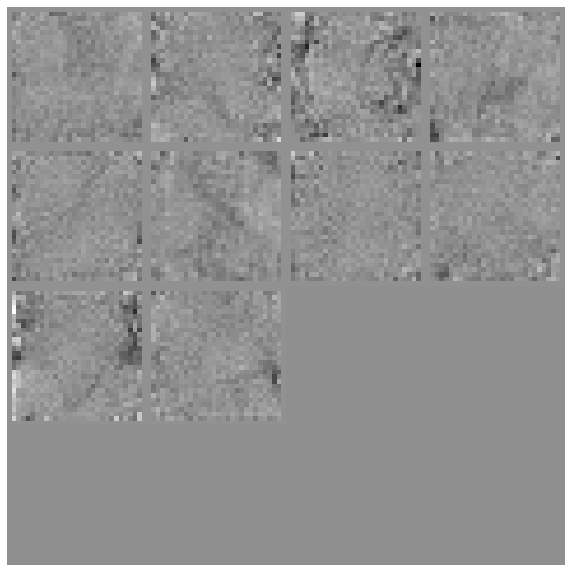

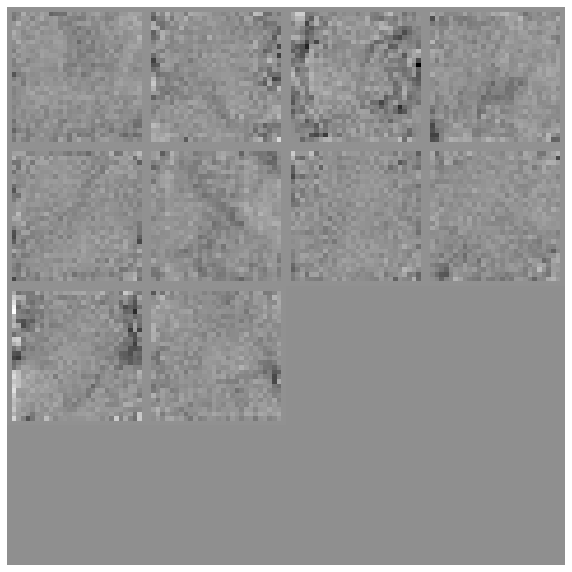

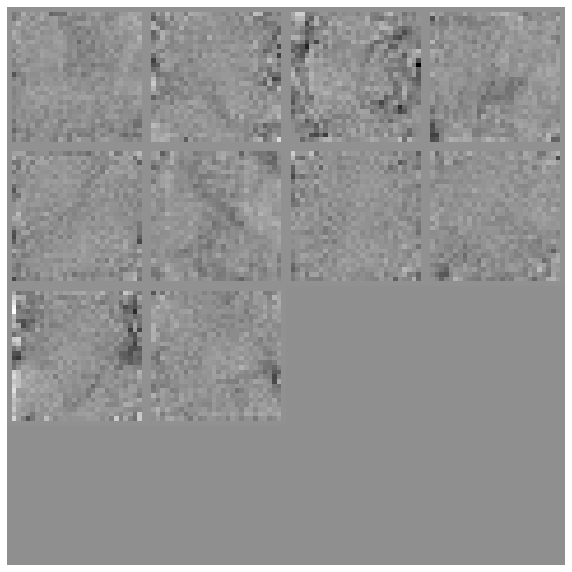

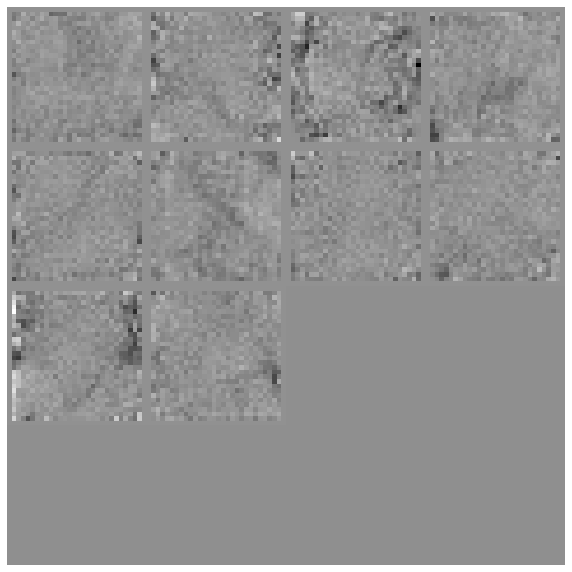

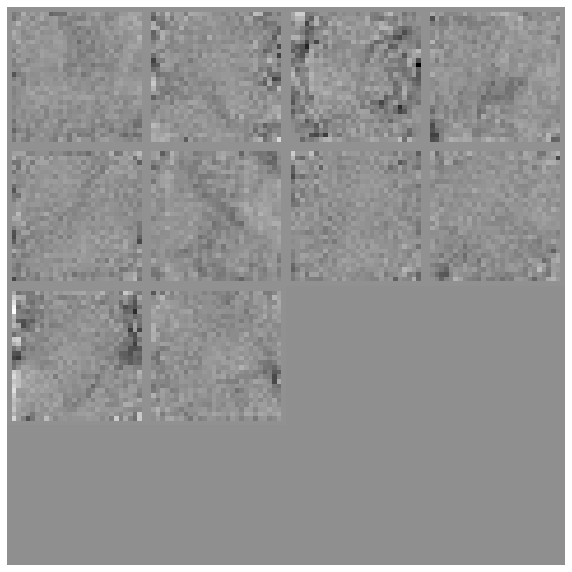

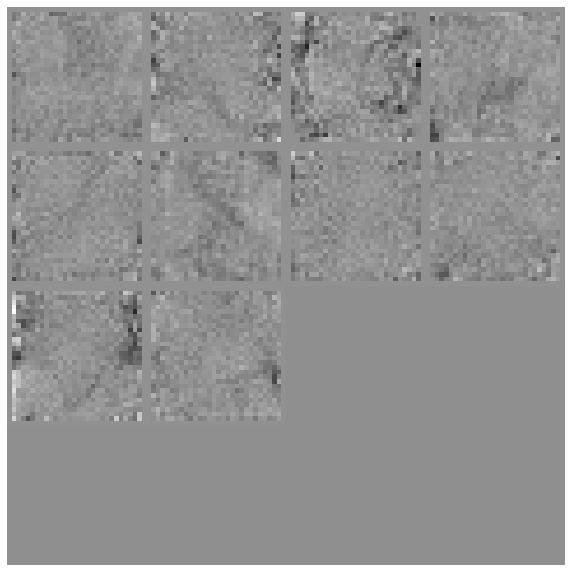

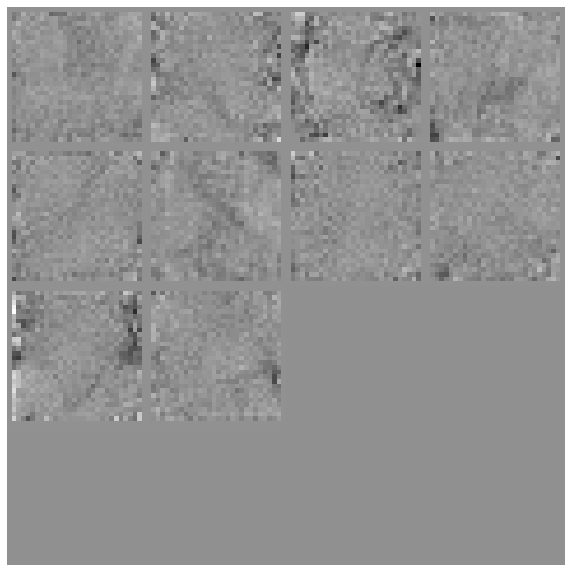

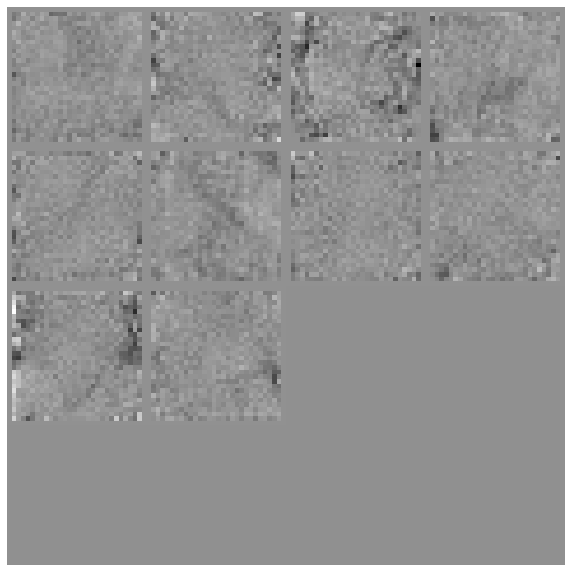

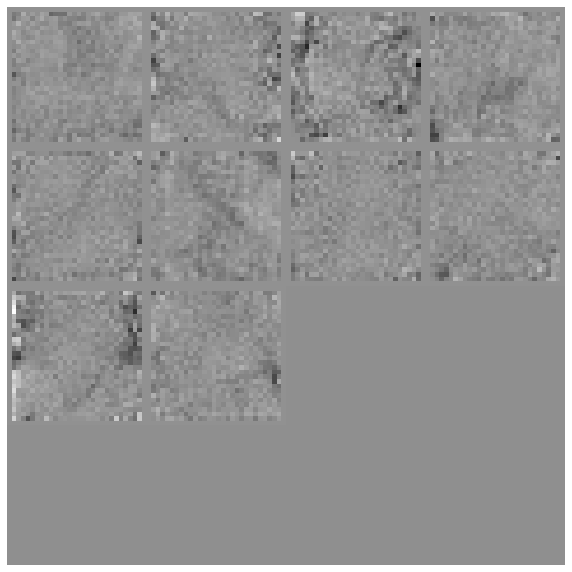

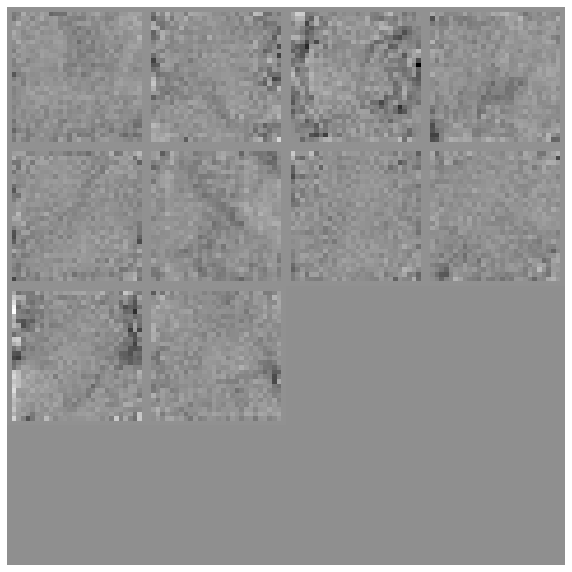

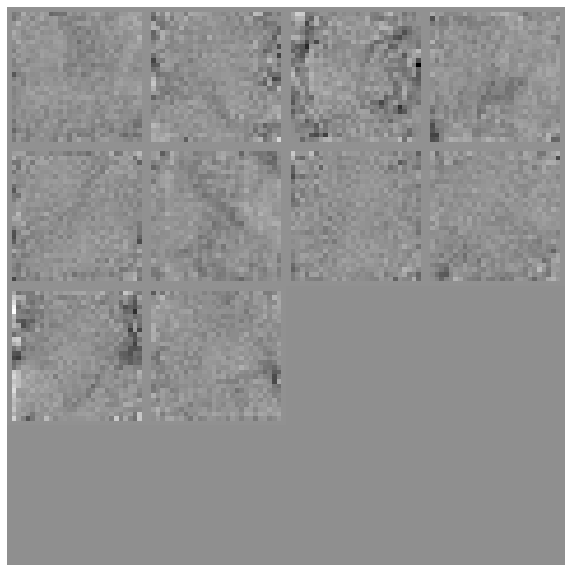

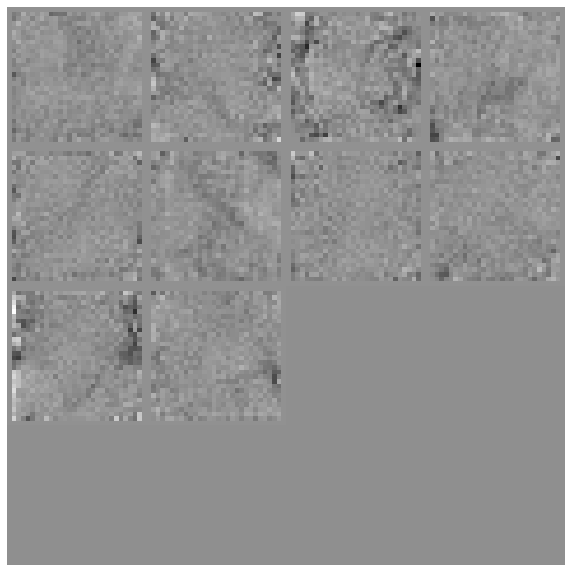

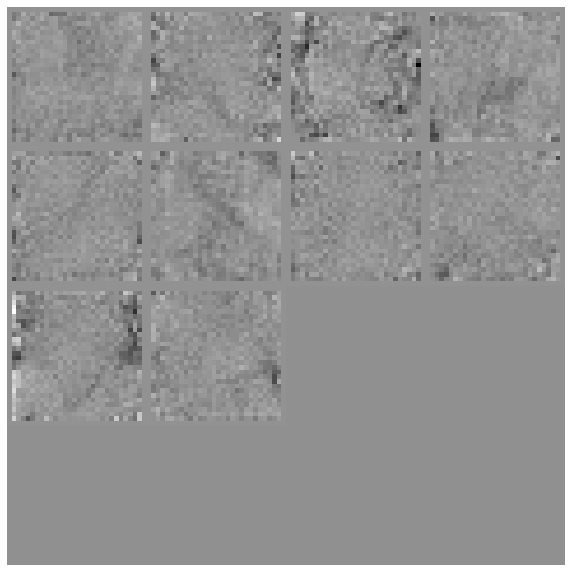

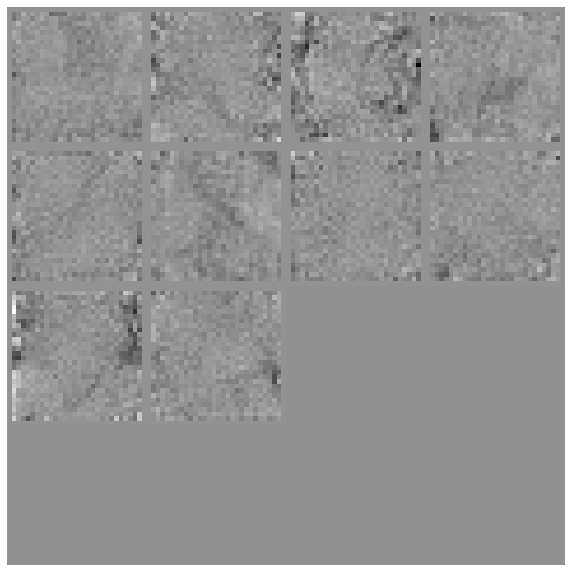

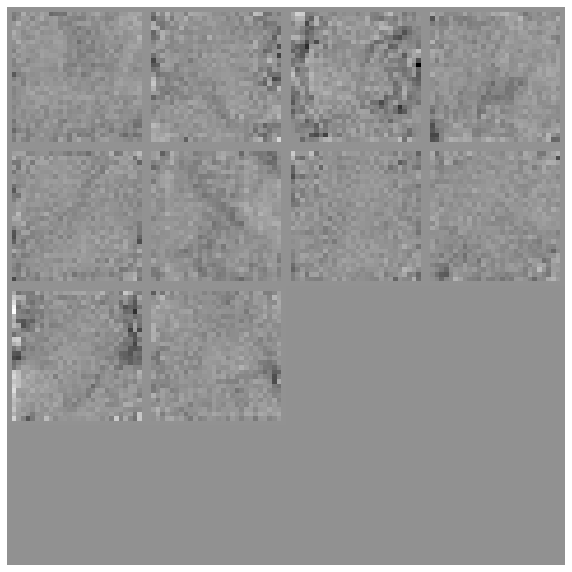

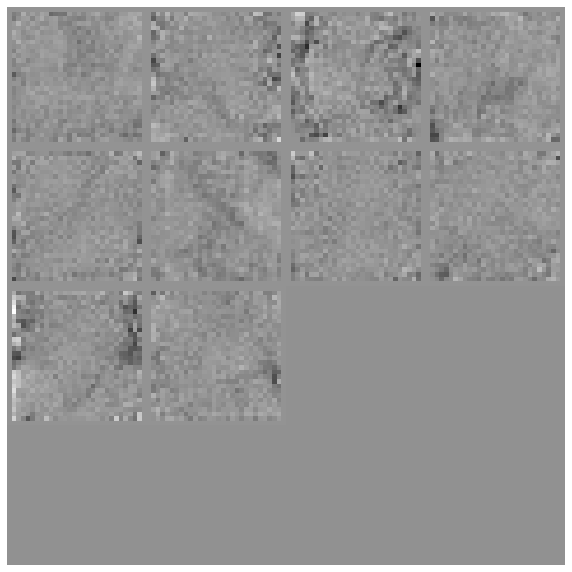

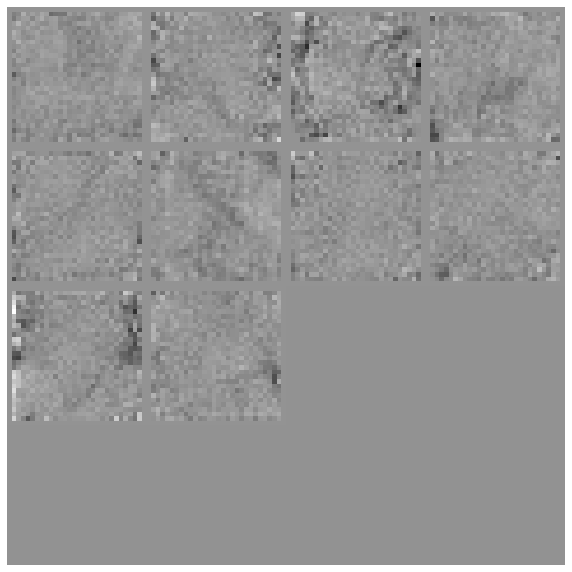

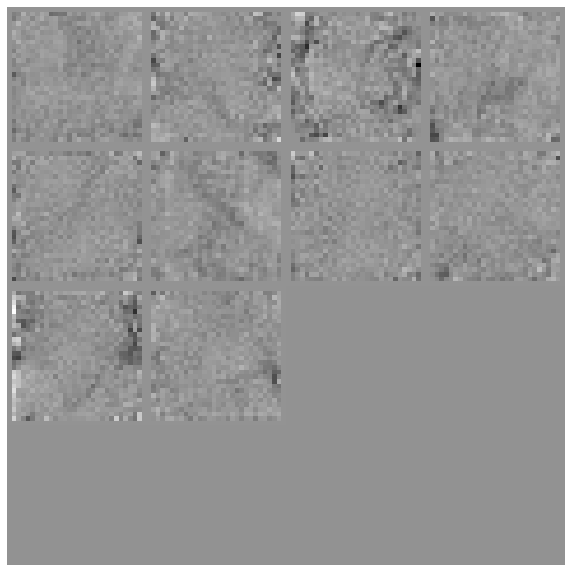

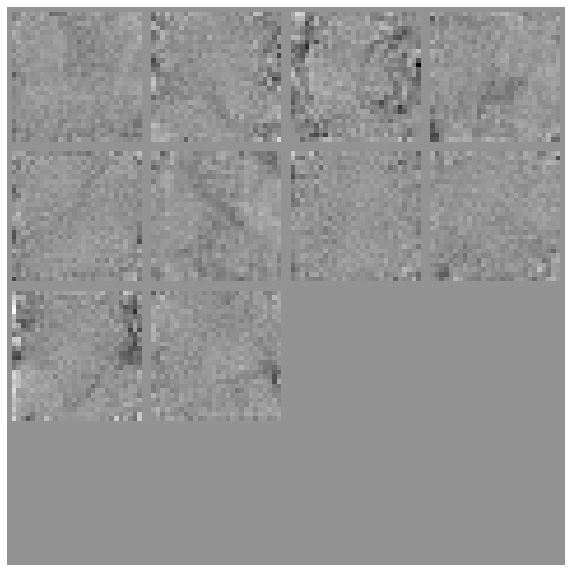

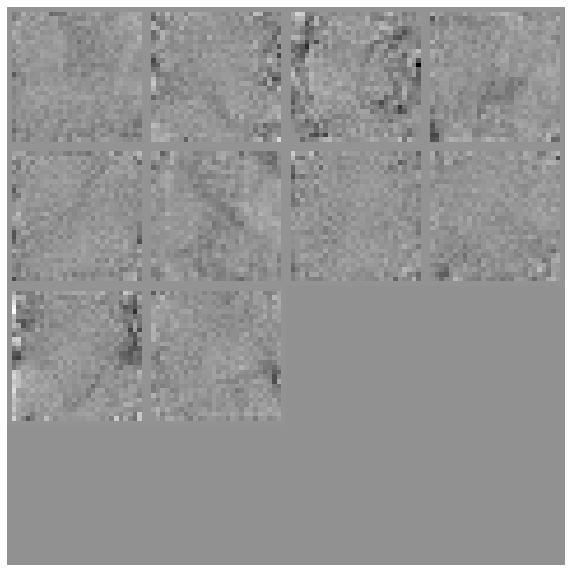

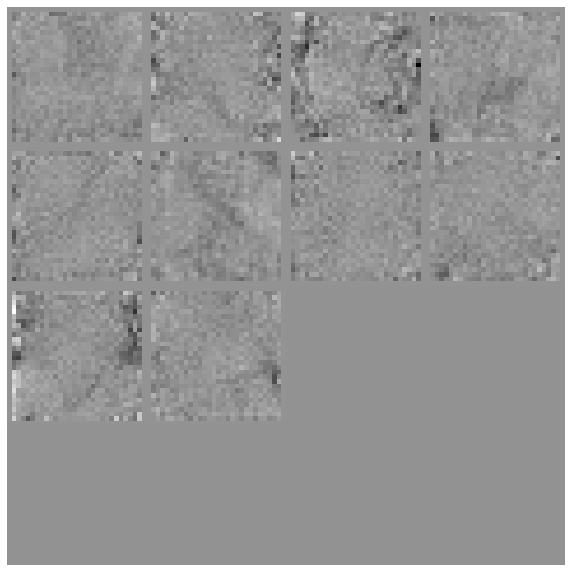

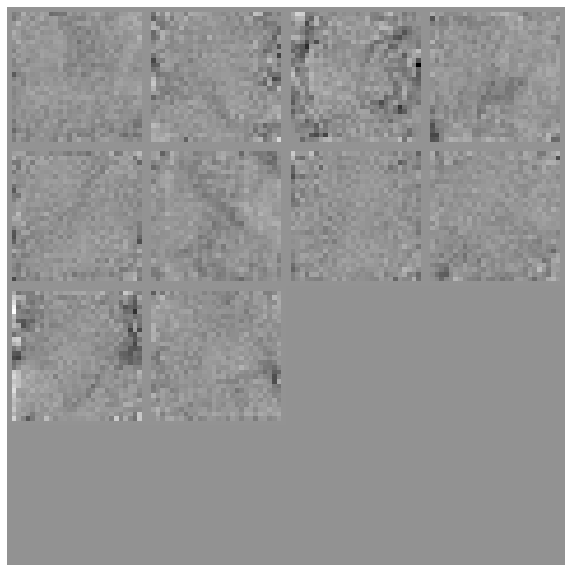

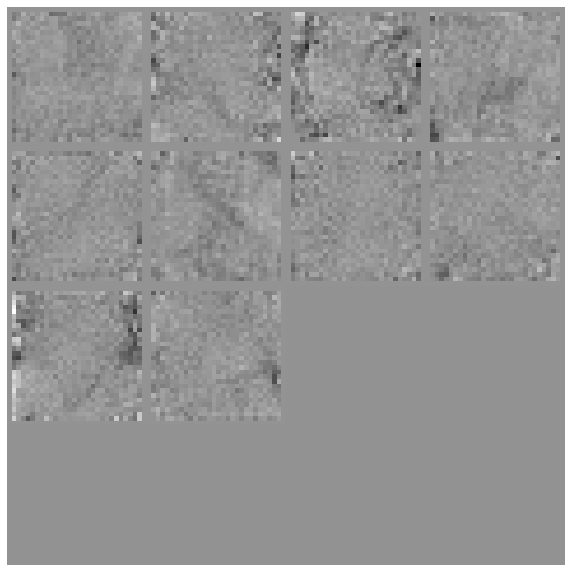

In [110]:
wb.init(project="Simple_Linear_Adam_KMNIST");
c = wb.config

c.h = 0.01
c.b = 1024
c.epochs = 100000

w = [GPU(Truncated_Normal((784,10)))]

optimizer = torch.optim.Adam(w, lr=c.h)  

for i in range(c.epochs):

    x,y = get_batch('train')

    loss = cross_entropy(softmax(model(x,w)),y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
   
    wb.log({"loss": loss})

    make_plots()

    if i % 1000 == 0 : montage_plot((w[0].T).reshape(10,28,28).cpu().detach().numpy())
# making plots of images within one image and running the loss. with each image it gets more distorted. it shaped to 10 images per slide with a size of 28 by 28

https://playground.tensorflow.org


https://tensorspace.org/

https://docs.google.com/presentation/d/1gY6kLb7YJtWzWqprVe3XfOjHALkPH6I1FvZ7MssWiTU/edit?usp=sharing